In [1]:
import numpy as np 
import pandas as pd
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# using double slash cause of unicode error
df = pd.read_csv('C:\\Users\\JOHN TOJO\\Flight_price.csv')
df

,Airline,Travel_date,From,To,Departure_time,Arrival_time,Duration_minutes,Stops,Price
0,Vistara,08/01/2023,Goa,Ahmedabad,21:55,22:55,1500,1.0,22729.0
1,Vistara,08/01/2023,Goa,Ahmedabad,22:45,16:40,1075,1.0,32110.0
2,Vistara,08/01/2023,Goa,Ahmedabad,21:55,15:00,1025,1.0,37988.0
3,Vistara,08/01/2023,Goa,Ahmedabad,22:45,15:00,975,2.0,64163.0
4,SpiceJet,08/01/2023,Goa,Tirupati,18:40,07:20,760,1.0,20473.0
...,...,...,...,...,...,...,...,...,...
2897,Vistara,11/01/2023,New Delhi,Mumbai,20:40,22:55,135,0.0,10155.0
2898,Air India,11/01/2023,New Delhi,Mumbai,10:15,15:50,335,1.0,10260.0
2899,Vistara,11/01/2023,New Delhi,Mumbai,19:00,21:15,135,0.0,11730.0
2900,Vistara,11/01/2023,New Delhi,Mumbai,19:45,22:00,135,0.0,11730.0


# **Data Cleaning**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2902 entries, 0 to 2901
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           2901 non-null   object 
 1   Travel_date       2902 non-null   object 
 2   From              2902 non-null   object 
 3   To                2902 non-null   object 
 4   Departure_time    2901 non-null   object 
 5   Arrival_time      2901 non-null   object 
 6   Duration_minutes  2902 non-null   int64  
 7   Stops             2902 non-null   float64
 8   Price             2901 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 204.2+ KB


In [4]:
# convert the 'Travel_date' column to a column of dates
df['Travel_date'] = pd.to_datetime(df['Travel_date'])

# extract the day from the 'Travel_date' column
df['day'] = df['Travel_date'].dt.month

# drop the 'Travel_date' column
df = df.drop(columns=['Travel_date'])

In [5]:
df['day']

0        8
1        8
2        8
3        8
4        8
        ..
2897    11
2898    11
2899    11
2900    11
2901    11
Name: day, Length: 2902, dtype: int64

In [6]:
#check for duplicates
df.duplicated().sum()


6

In [7]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df = df.reset_index(drop=True)
# check 
df.duplicated().sum()

0

In [8]:
# Checking for unique values in each columns
df.nunique()

Airline               54
From                   6
To                     6
Departure_time       249
Arrival_time         252
Duration_minutes     244
Stops                  4
Price               1588
day                    4
dtype: int64

In [9]:
# check for nulls
df.isna().sum().sum()

4

In [10]:
df.isna().sum()

Airline             1
From                0
To                  0
Departure_time      1
Arrival_time        1
Duration_minutes    0
Stops               0
Price               1
day                 0
dtype: int64

In [11]:
# Find rows with null values
mask = df.isnull().any(axis=1)

# Use the mask to select the rows with null values
null_rows = df[mask]
null_rows

,Airline,From,To,Departure_time,Arrival_time,Duration_minutes,Stops,Price,day
6,NaN,Goa,Bengaluru,NaN,NaN,0,1.0,NaN,8


since the null data is present in the same row its better to remove it 

In [12]:
# Drop rows with null values
df = df.dropna()

# Reset the index
df = df.reset_index(drop=True)
df

,Airline,From,To,Departure_time,Arrival_time,Duration_minutes,Stops,Price,day
0,Vistara,Goa,Ahmedabad,21:55,22:55,1500,1.0,22729.0,8
1,Vistara,Goa,Ahmedabad,22:45,16:40,1075,1.0,32110.0,8
2,Vistara,Goa,Ahmedabad,21:55,15:00,1025,1.0,37988.0,8
3,Vistara,Goa,Ahmedabad,22:45,15:00,975,2.0,64163.0,8
4,SpiceJet,Goa,Tirupati,18:40,07:20,760,1.0,20473.0,8
...,...,...,...,...,...,...,...,...,...
2890,Vistara,New Delhi,Mumbai,20:40,22:55,135,0.0,10155.0,11
2891,Air India,New Delhi,Mumbai,10:15,15:50,335,1.0,10260.0,11
2892,Vistara,New Delhi,Mumbai,19:00,21:15,135,0.0,11730.0,11
2893,Vistara,New Delhi,Mumbai,19:45,22:00,135,0.0,11730.0,11


In [13]:
df[['Arrival_time_hour', 'Arrival_time_min']] = df['Arrival_time'].str.split(':', expand=True)
df['Arrival_time_hour'] = df['Arrival_time_hour'].str.strip()
df['Arrival_time_min'] = df['Arrival_time_min'].str.strip()

df[['Departure_time_hour', 'Departure_time_min']] = df['Departure_time'].str.split(':', expand=True)
df['Departure_time_hour'] = df['Departure_time_hour'].str.strip()
df['Departure_time_min'] = df['Departure_time_min'].str.strip()

df.drop(['Arrival_time','Departure_time'], axis=1, inplace=True)

# seperating numerical and categorical data type

In [14]:

numericalCol=df.select_dtypes(include=np.number).columns
print("The numerical columns are:",numericalCol)
print('\n')
objectColumns=df.select_dtypes(include=np.object).columns
print("The categorical columns are:",objectColumns)

The numerical columns are: Index(['Duration_minutes', 'Stops', 'Price', 'day'], dtype='object')


The categorical columns are: Index(['Airline', 'From', 'To', 'Arrival_time_hour', 'Arrival_time_min',
       'Departure_time_hour', 'Departure_time_min'],
      dtype='object')


In [15]:
# seperating numerical columns into two categories discrete and continuous
discretecols=[]
continuecols=[]

for column in numericalCol:
     if df[column].nunique()>50:
        continuecols.append(column)
     
     else:
        discretecols.append(column)
        
print("The discrete columns are:",discretecols)
print('\n')
print("The continuous columns are:",continuecols) 




The discrete columns are: ['Stops', 'day']


The continuous columns are: ['Duration_minutes', 'Price']


# **EDA**

In [16]:
df1=df.copy()
df1[['first_airline', 'second_airline']] = df1['Airline'].str.split(',', expand=True)
df1.drop(['Airline'], axis=1, inplace=True)
df1


,From,To,Duration_minutes,Stops,Price,day,Arrival_time_hour,Arrival_time_min,Departure_time_hour,Departure_time_min,first_airline,second_airline
0,Goa,Ahmedabad,1500,1.0,22729.0,8,22,55,21,55,Vistara,None
1,Goa,Ahmedabad,1075,1.0,32110.0,8,16,40,22,45,Vistara,None
2,Goa,Ahmedabad,1025,1.0,37988.0,8,15,00,21,55,Vistara,None
3,Goa,Ahmedabad,975,2.0,64163.0,8,15,00,22,45,Vistara,None
4,Goa,Tirupati,760,1.0,20473.0,8,07,20,18,40,SpiceJet,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2890,New Delhi,Mumbai,135,0.0,10155.0,11,22,55,20,40,Vistara,None
2891,New Delhi,Mumbai,335,1.0,10260.0,11,15,50,10,15,Air India,None
2892,New Delhi,Mumbai,135,0.0,11730.0,11,21,15,19,00,Vistara,None
2893,New Delhi,Mumbai,135,0.0,11730.0,11,22,00,19,45,Vistara,None


In [17]:
numerical=df1.select_dtypes(include=np.number).columns
print("The numerical columns are:",numerical)

# seperating numerical columns into two categories discrete and continuous
discretecol=[]
continuecol=[]

for column in numerical:
     if df1[column].nunique()>50:
        continuecol.append(column)
     
     else:
        discretecol.append(column)
        
print("The discrete columns are:",discretecol)
print('\n')
print("The continuous columns are:",continuecol) 
print('\n')
objectColumn=df1.select_dtypes(include=np.object).columns
print("The categorical columns are:",objectColumn)


The numerical columns are: Index(['Duration_minutes', 'Stops', 'Price', 'day'], dtype='object')
The discrete columns are: ['Stops', 'day']


The continuous columns are: ['Duration_minutes', 'Price']


The categorical columns are: Index(['From', 'To', 'Arrival_time_hour', 'Arrival_time_min',
       'Departure_time_hour', 'Departure_time_min', 'first_airline',
       'second_airline'],
      dtype='object')


In [18]:
#checking how the data is defined statistically for numerical continuous datas and visualising
df1[continuecol].describe().T

,count,mean,std,min,25%,50%,75%,max
Duration_minutes,2895.0,313.827634,282.881362,55.0,115.0,170.0,430.0,1635.0
Price,2895.0,8825.757168,4651.558738,1899.0,5803.5,7829.0,10846.5,64163.0


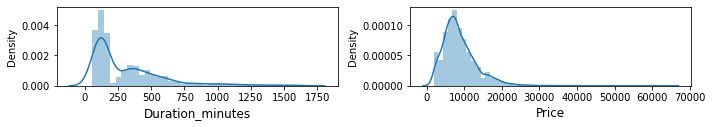

In [19]:
# plotting distribution graph 
import matplotlib.pyplot as plt
import seaborn as sns
j=0
plt.figure(figsize=(10,10))
for column in df1[continuecol]:
    plt.subplot(6,2,j+1)
    sns.distplot(df1[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

* The mean duration of the flights is around 313.8 minutes, with a standard deviation of 282.88 minutes

* The minimum duration of the flight is 55 minutes and the maximum duration of the flight is 1635 minutes
 
* The mean price of the flights is around 8825.76, with a standard deviation of 4651.56

* The minimum price of the flight is 1899 and the maximum price of the flight is 64163
 
* The duration of flight and prices of flight have wide range of variation
 
* presence of outliers 

In [20]:
# checking how the data is defined statistically for numerical discrete datas and visualising
df1[discretecol].describe().T

,count,mean,std,min,25%,50%,75%,max
Stops,2895.0,0.509154,0.585327,0.0,0.0,0.0,1.0,3.0
day,2895.0,9.784111,0.946033,8.0,9.0,10.0,11.0,11.0


Stops
0.0    1545
1.0    1236
2.0     104
3.0      10
Name: Stops, dtype: int64


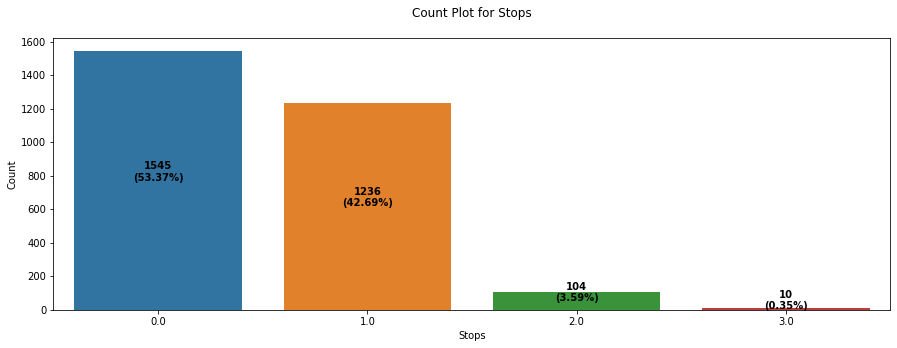

day
10    968
9     877
11    784
8     266
Name: day, dtype: int64


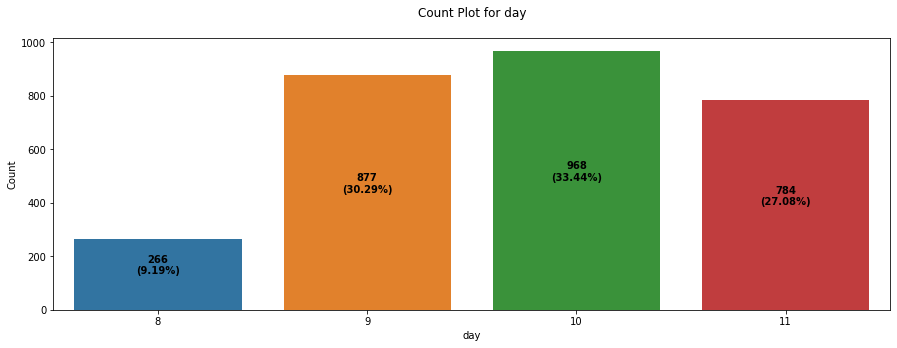

In [21]:
 #listing all Categorical data and plotting 
for x in discretecol:
    print(x)
    print(df1[x].value_counts())
    plt.figure(figsize=(15,5))
    col_name = x
    values = df1[x].value_counts()
    index = 0
    ax = sns.countplot(df1[x])

    for i in ax.patches:
        h = i.get_height() #Count of each value
        t = len(df1[col_name]) # Total no of records using length
        s = f"{h}\n({round(h*100/t,2)}%)" #Displaying in count bar
        plt.text(index, h/2, s, ha="center", fontweight="bold")
        index += 1
    
    plt.title(f"Count Plot for {x}\n")
    plt.xlabel(x)
    plt.ylabel(f"Count")
    plt.show()

* The mean number of stops for flights is around 0.509154, with a standard deviation of 0.585327.

* The minimum number of stops for a flight is 0 and the maximum number of stops for a flight is 3.

* most of the flights are non stop followed by 1 stop

* The mean day of flight is around 9.784111, with a standard deviation of 0.946033.

* The minimum day of flight is 8 and the maximum day of flight is 11.

* most of the data is accumulated on day 10 followed by day 9

In [22]:
# checking how the data is defined statistically for categorical datas`and visualising
df1[objectColumn].describe(include=['O'])

,From,To,Arrival_time_hour,Arrival_time_min,Departure_time_hour,Departure_time_min,first_airline,second_airline
count,2895,2895,2895,2895,2895,2895,2895,282
unique,6,6,24,13,24,13,9,9
top,New Delhi,New Delhi,23,55,21,00,IndiGo,Go First
freq,662,726,242,324,196,386,1170,95


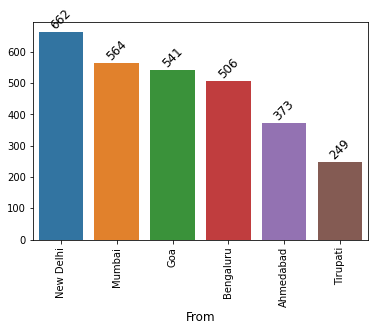

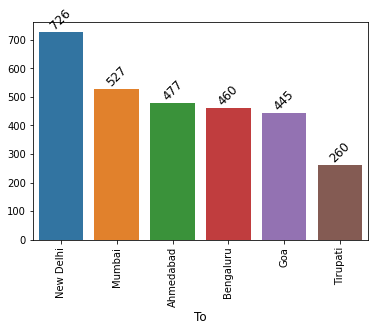

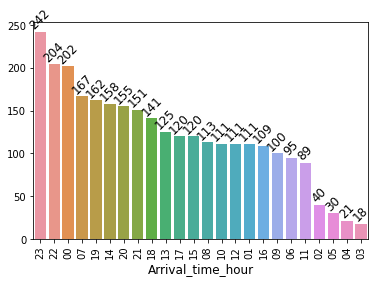

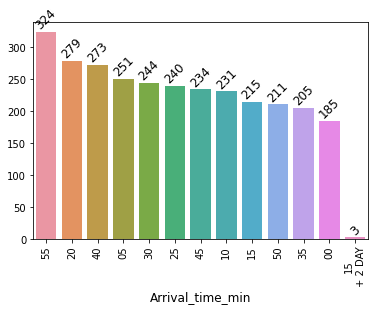

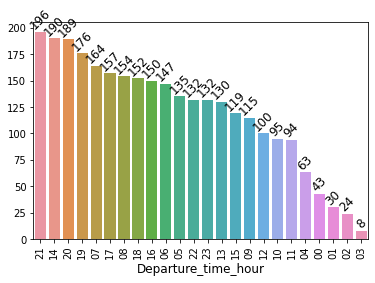

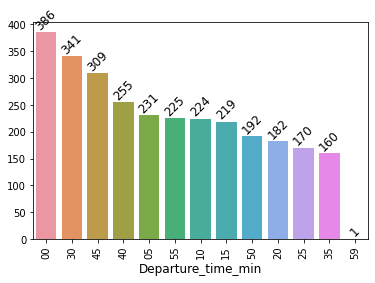

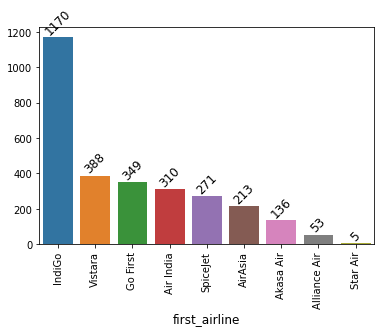

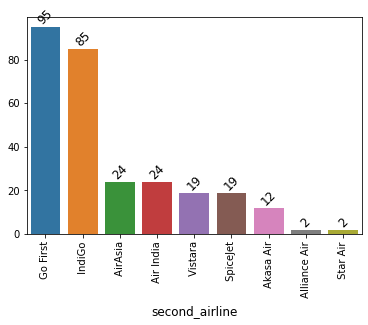

In [23]:
# Iterate over the list of columns
for column in objectColumn:
    # Transpose the DataFrame to show the values of the column on the y-axis
    df1_T = df1[column].value_counts().to_frame().T
    # create a barplot
    ax = sns.barplot(data=df1_T)
    # Add the values to the bars
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
                fontsize=12, color='black', ha='center', va='bottom',rotation=45)
    # rotate by 90    
    plt.xticks(rotation=90)
   # add padding between the x-axis labels
    plt.xlabel(column, fontsize=12);
    # Show the plot
    plt.show()

**based on To and From inference** 
* New Delhi is a popular destination: The fact that most people are traveling to New Delhi suggests that it is a popular destination among travelers.

* Tirupati is not as popular a destination: The fact that least people want to travel to Tirupati indicates that it is not as popular a destination as New Delhi.

* New Delhi is a common starting point: The fact that most people are traveling from New Delhi suggests that it is a common starting point for many travelers.

* Tirupati may be a less-populated area: The fact that least people are traveling from Tirupati suggests that it may be a less-populated area compared to New Delhi.

* New Delhi may be a more accessible location: The fact that most people are traveling from and to New Delhi suggests that it may be more easily accessible to people.

**based on arrival and departure times**
* There are more flights scheduled to arrive at 23 hr than at 03 hr.

* There may be a higher demand for flights at 23 hr than at 03 hr.

* The airport may have more capacity to handle flights at 23 hr than at 03 hr.

* There could be operational reasons such as less congestion or traffic at 23 hr than at 03 hr, so flights are scheduled to arrive at that time.

* there is higher arrival of flight at 21 hr than at 03 hr 

* it can be seen that most of the flights depart and arrive at the latter half of the day

* The company has chosen that time as it may be cheaper to operate during those hours.

**based on first_airline and second_airline(connection airline if there are stops)**
* Indigo has a better reputation and customer satisfaction than StarAir.

* People may find Indigo flights more affordable or convenient than StarAir flights.

* Gofirst may have a better reputation or provide better service than Star Air for connecting flights.

* People may find Gofirst flights more affordable or convenient than StarAir flights for connecting flights.


# Bivariate analysis

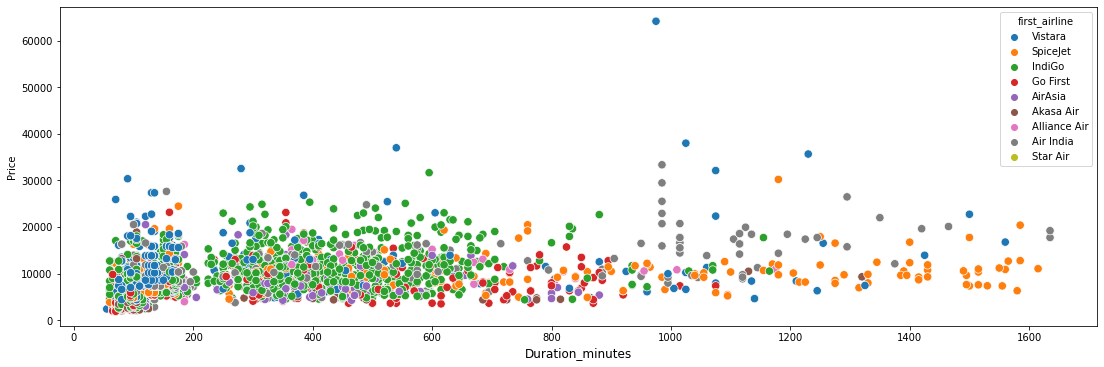

In [24]:
j=0

plt.figure(figsize=(30,30))
for column in df1[continuecols[:1]]:
    plt.subplot(6,2,j+1)
    sns.scatterplot(data=df1,x=column,s=70, y="Price", hue="first_airline")
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

* Vistara is faster but more expensive than other airlines.
* Indigo offers more options for non-stop and connecting flights, and its connecting flights are comparatively cheaper.
* Air India flights are more expensive and take longer to reach the destination.
* Spice Jet has longer duration flights indicating multiple stops and is cheaper than the other airlines.
* Indigo may have a larger market share for domestic flights than other airlines.
* Vistara may be considered as a higher quality airline than the other options.
* Air India may be preferred for international flights rather than domestic flights.
* Spice jet may be used for low-budget or travel for time constraints, but it will take longer time to reach the destination.



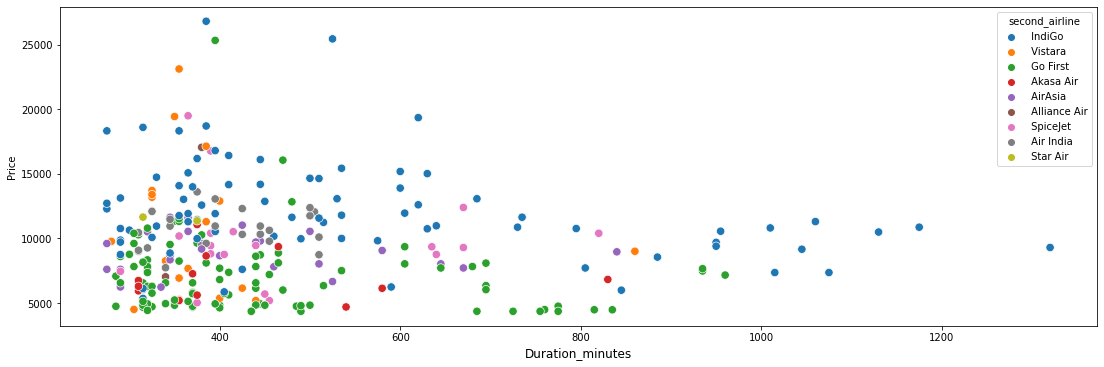

In [25]:
j=0

plt.figure(figsize=(30,30))
for column in df1[continuecols[:1]]:
    plt.subplot(6,2,j+1)
    sns.scatterplot(data=df1,x=column,s=70, y="Price", hue="second_airline")
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout()

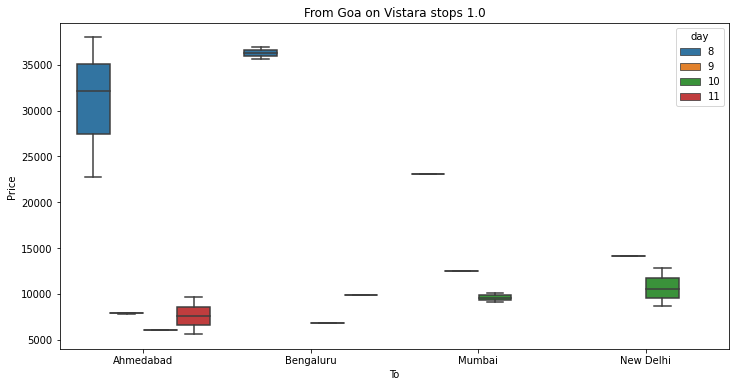

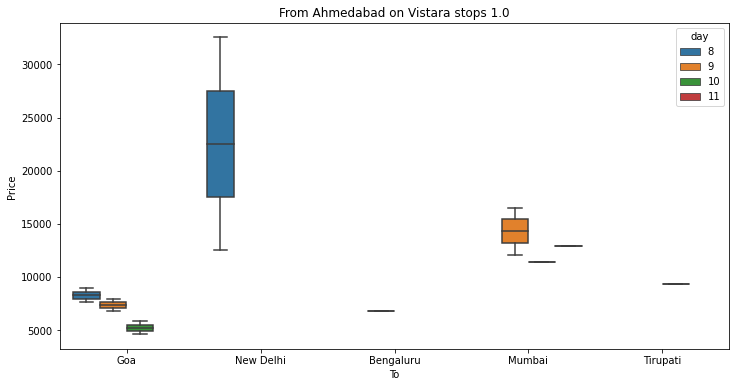

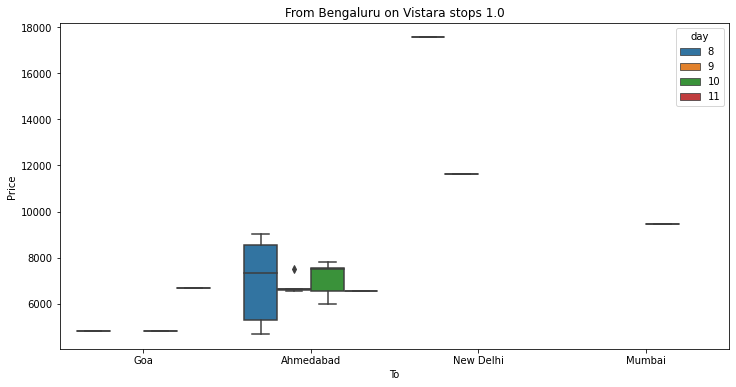

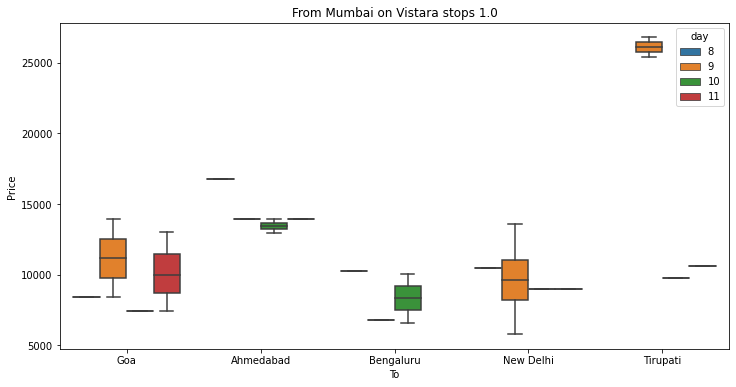

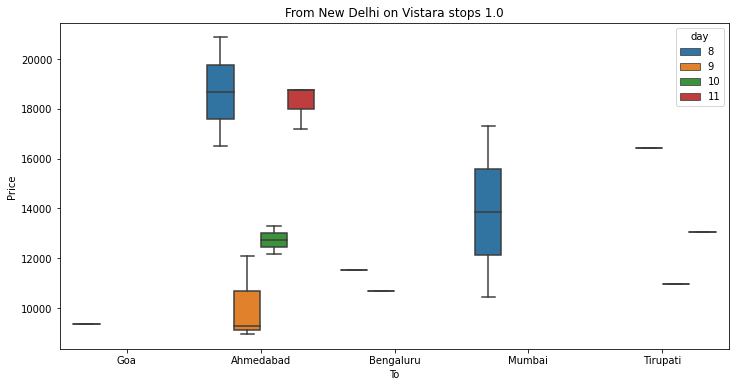

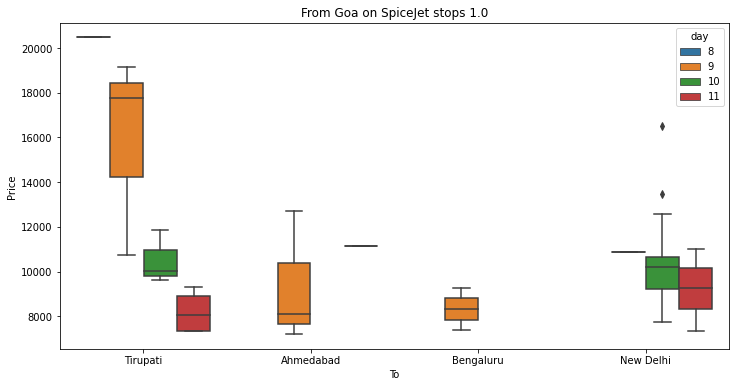

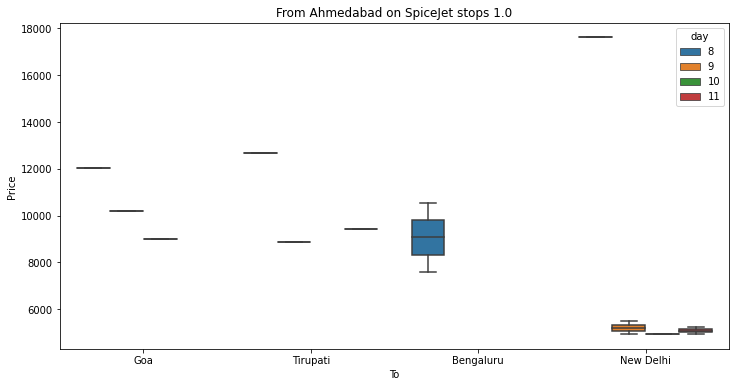

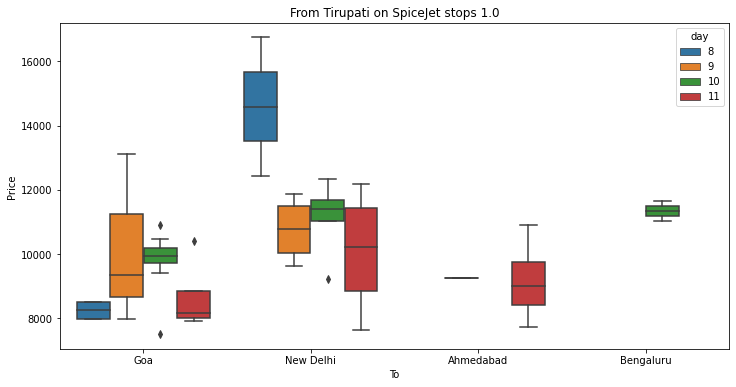

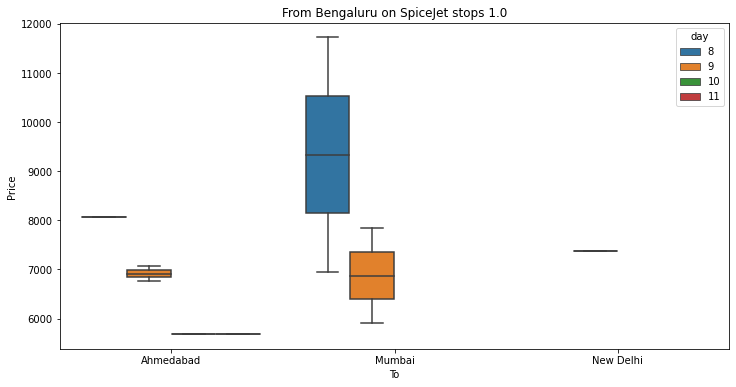

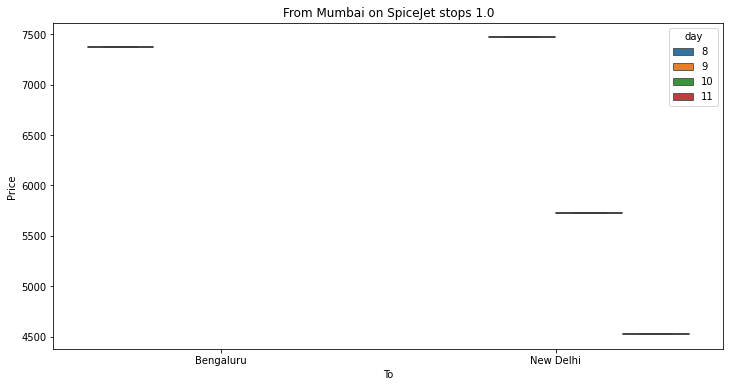

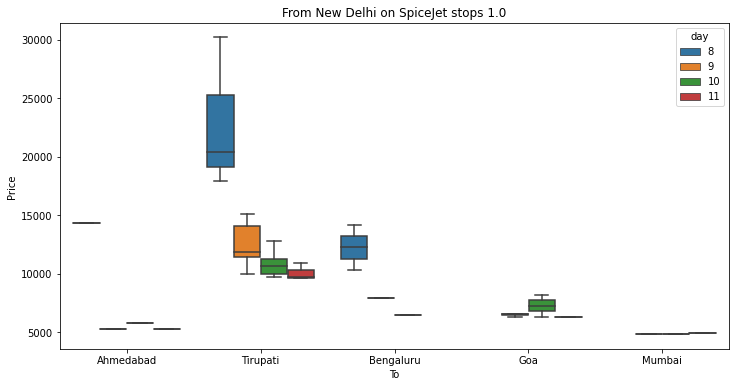

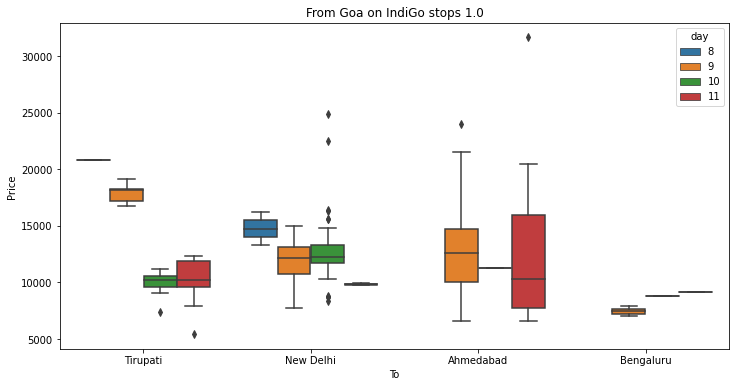

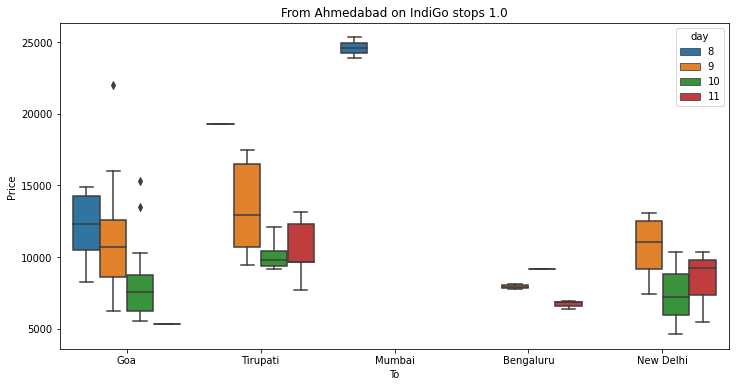

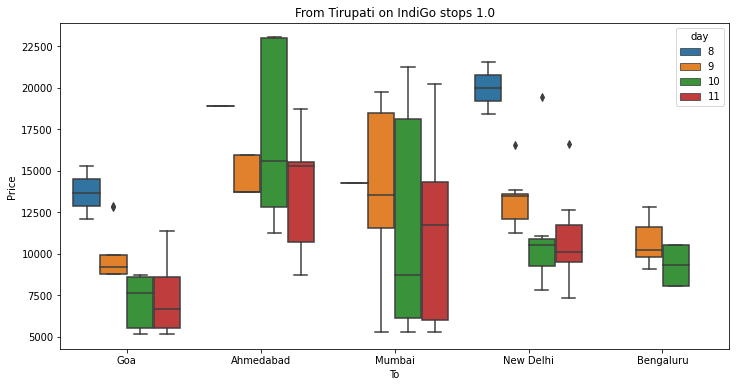

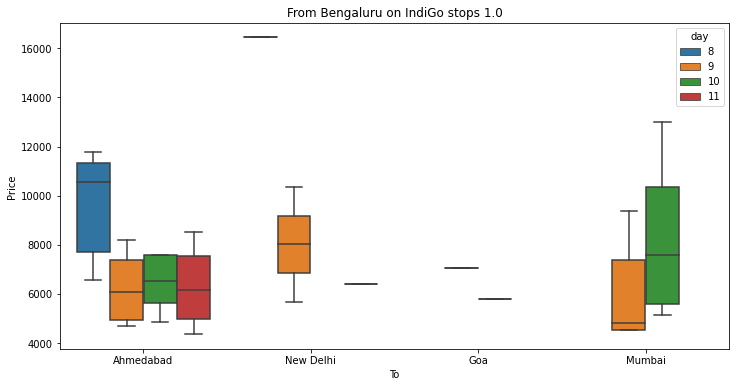

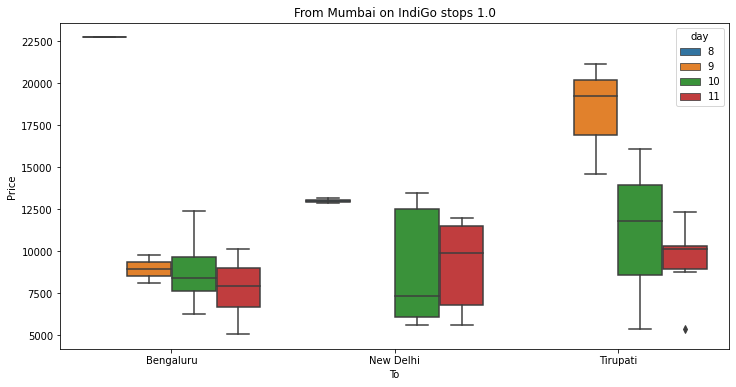

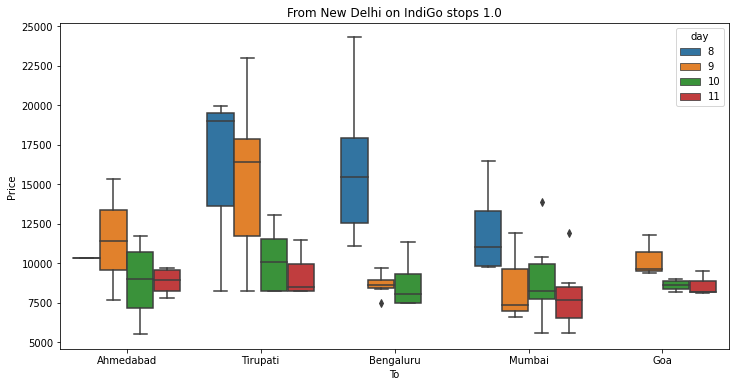

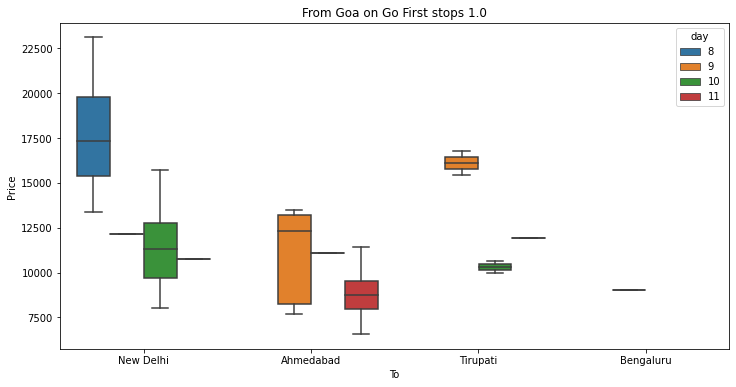

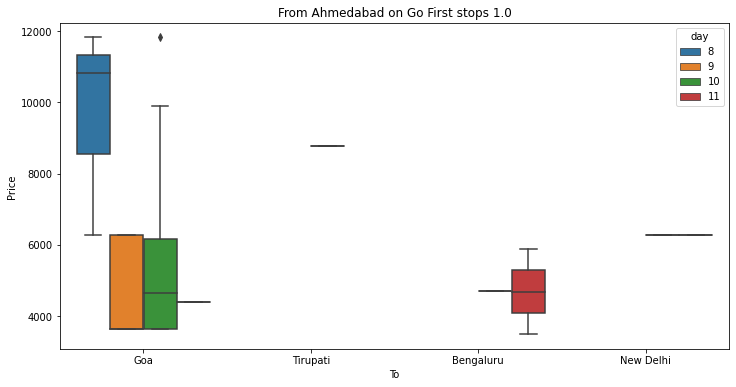

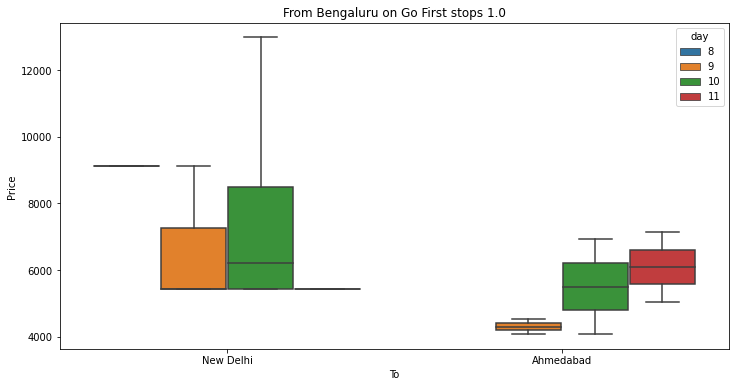

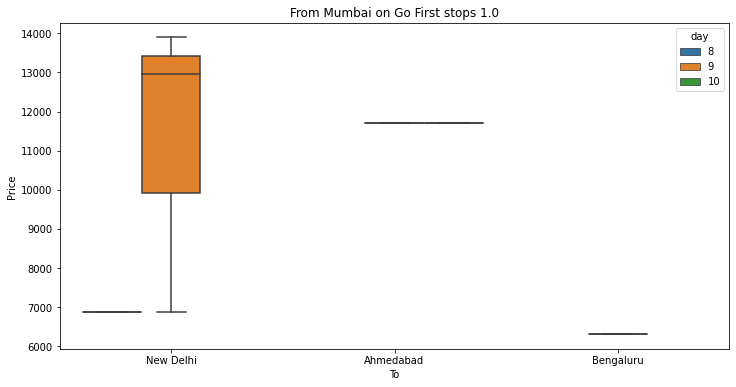

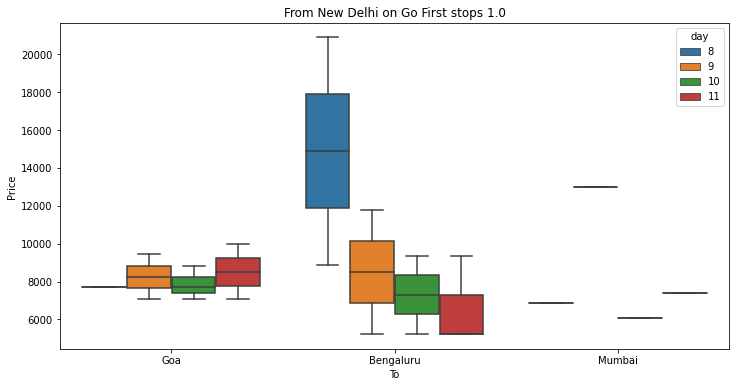

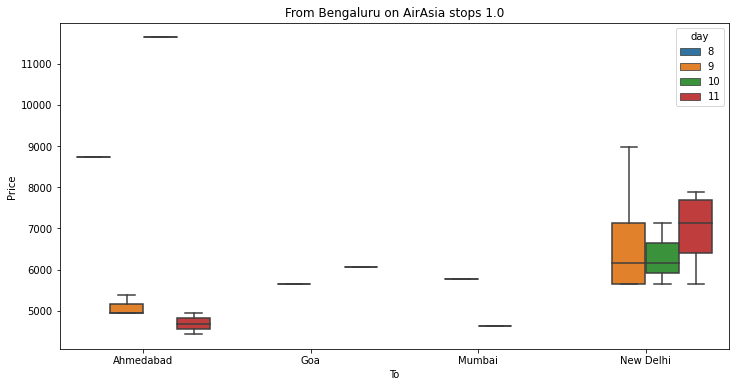

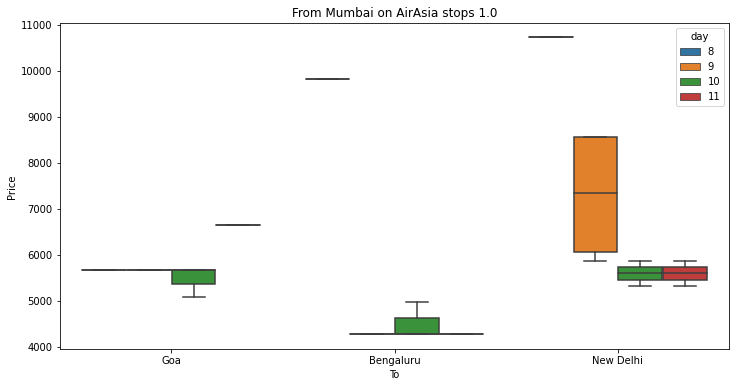

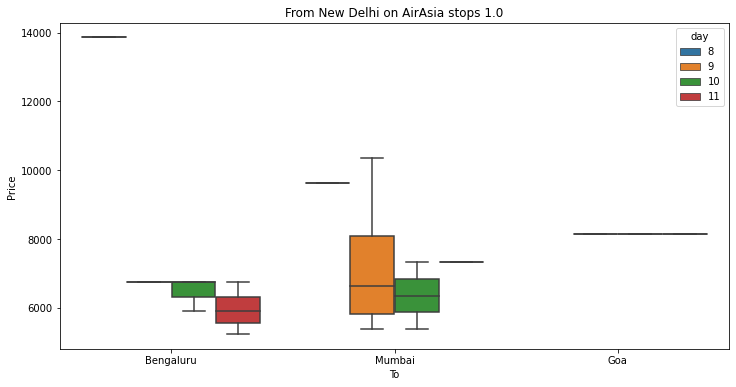

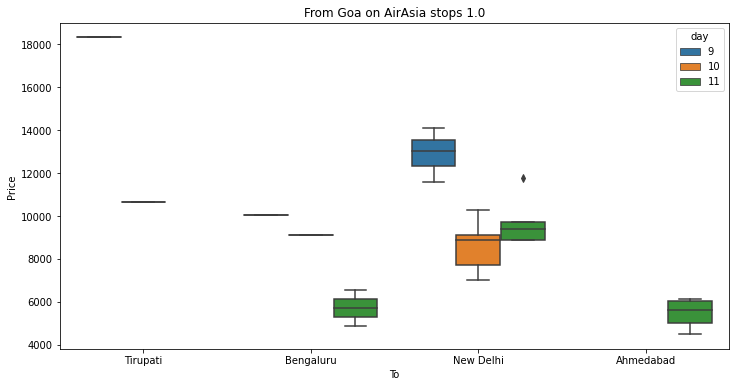

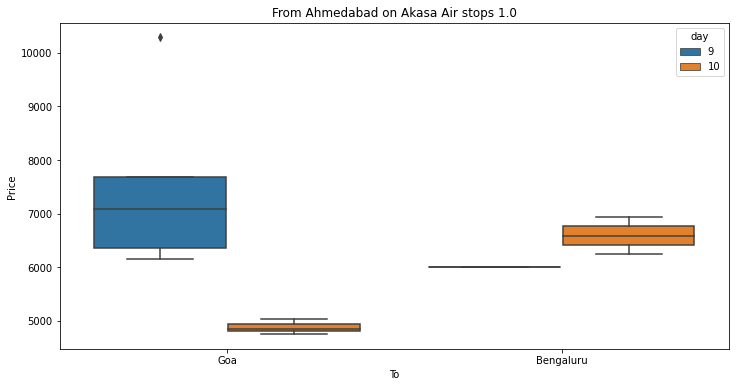

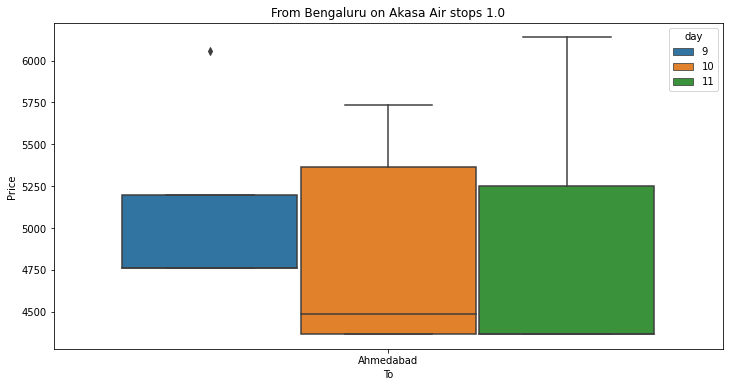

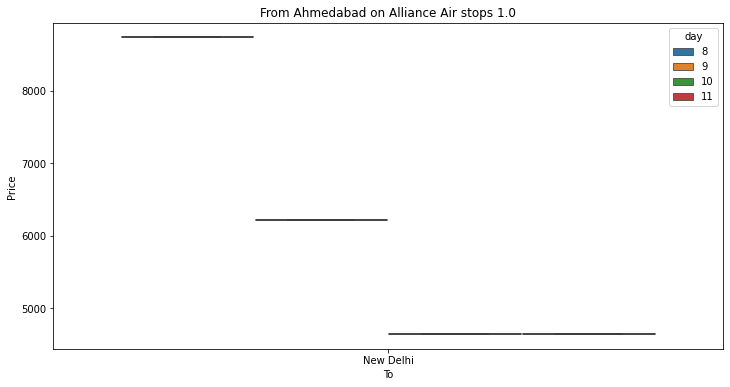

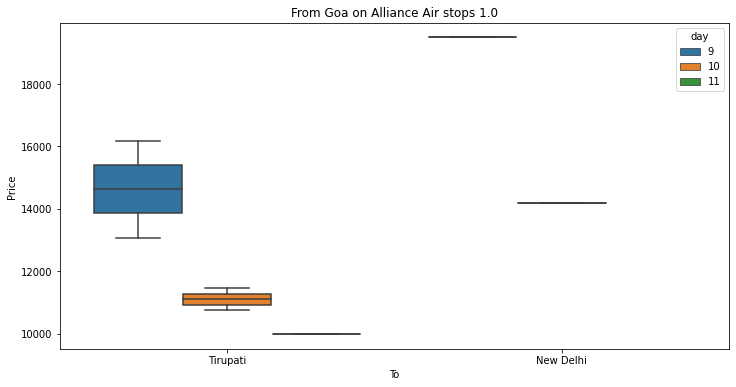

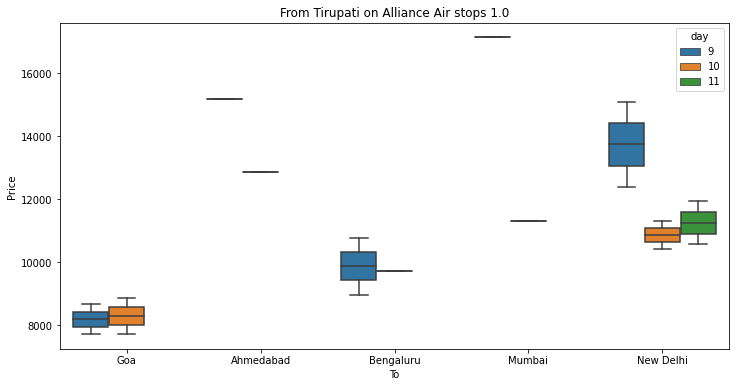

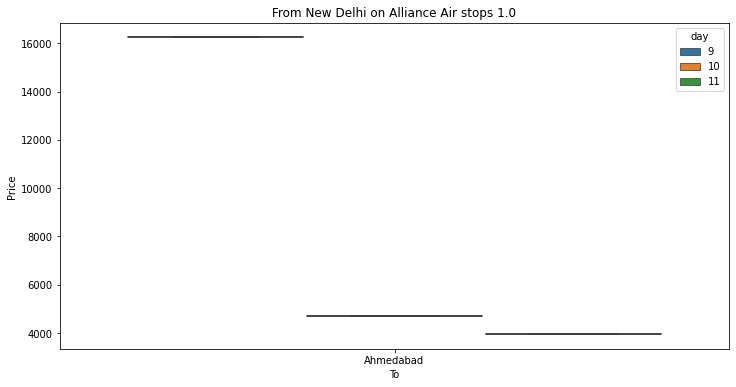

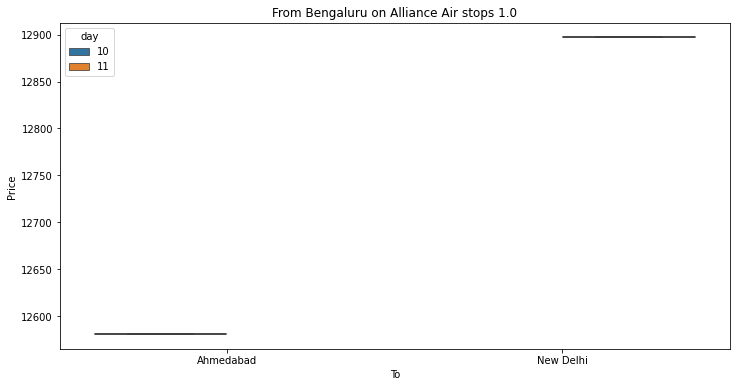

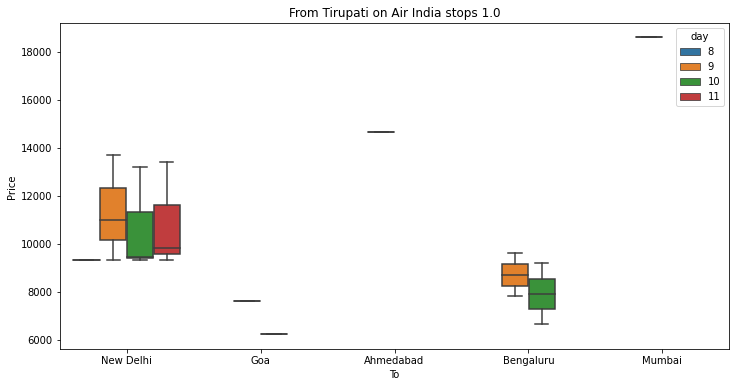

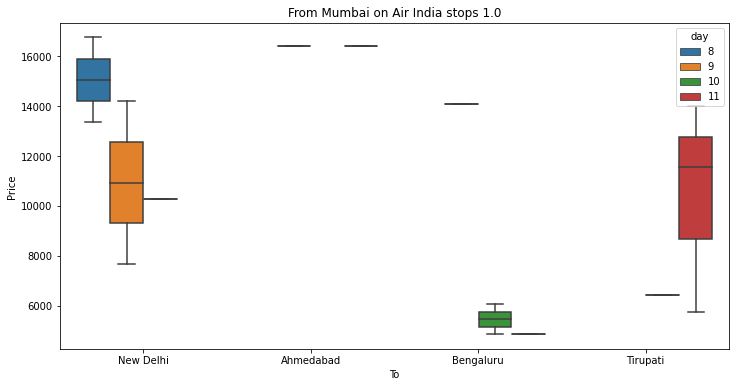

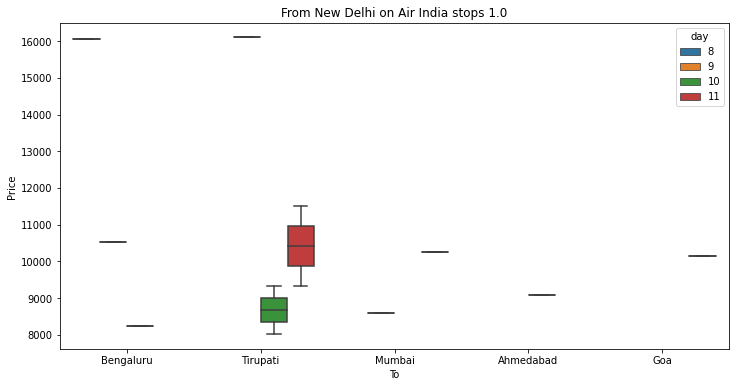

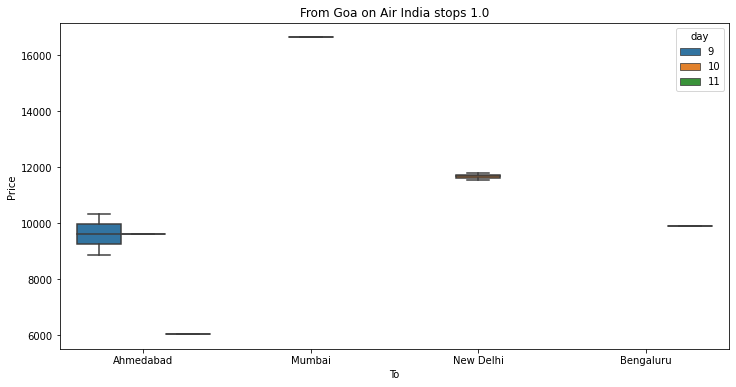

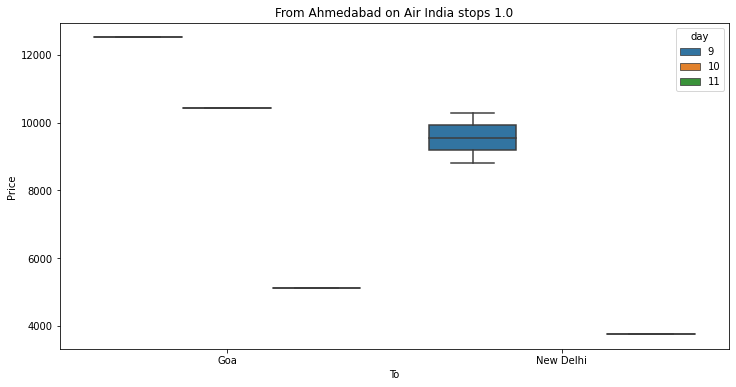

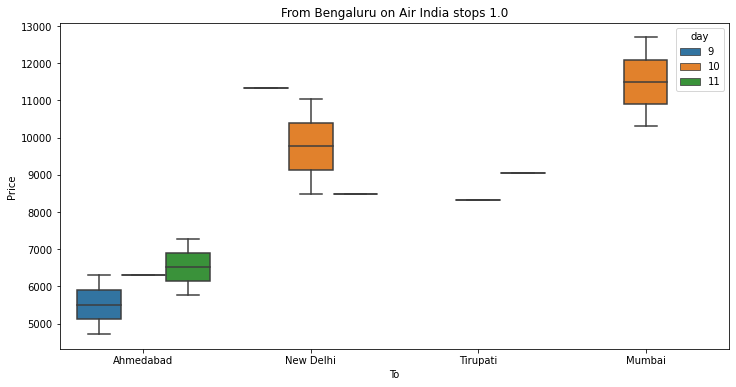

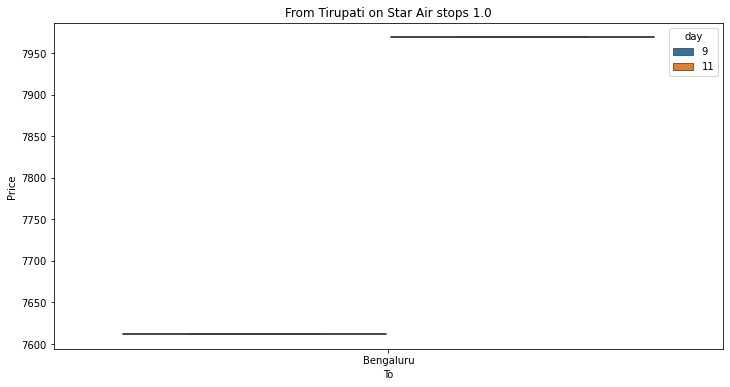

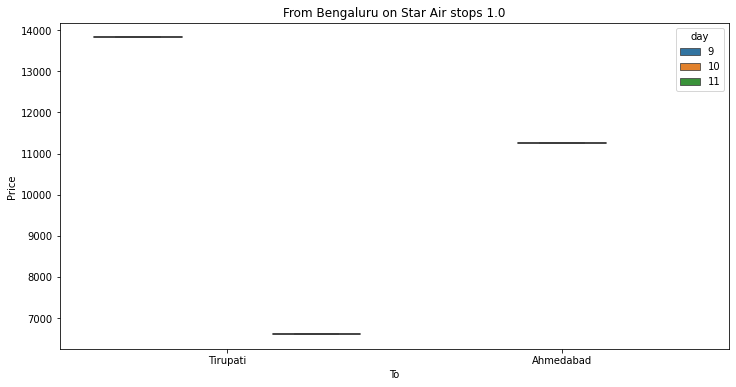

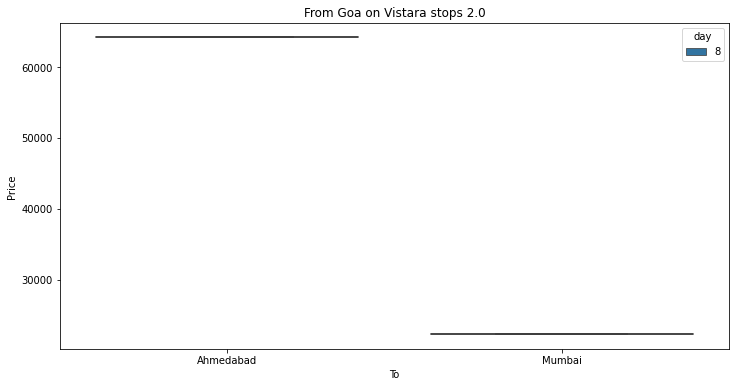

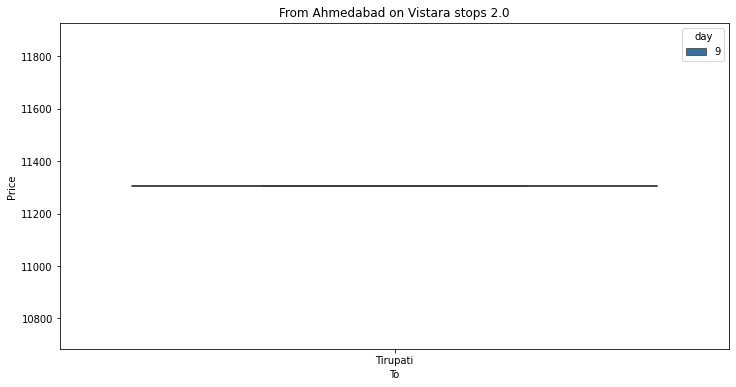

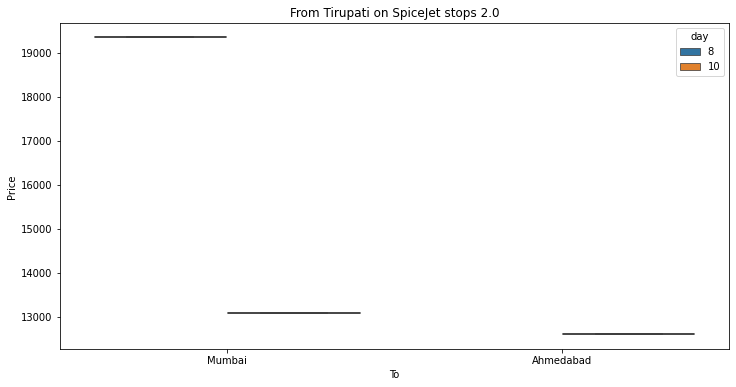

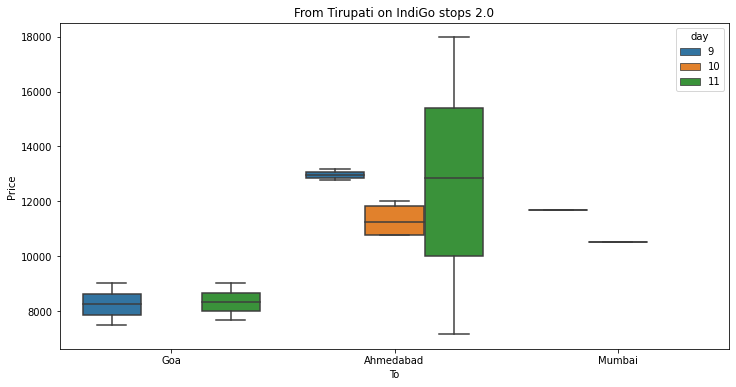

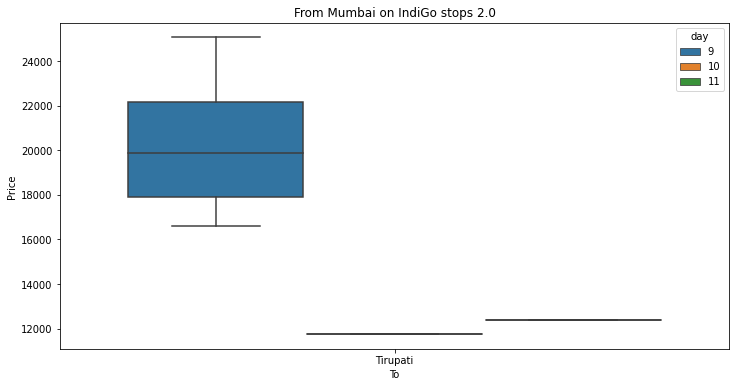

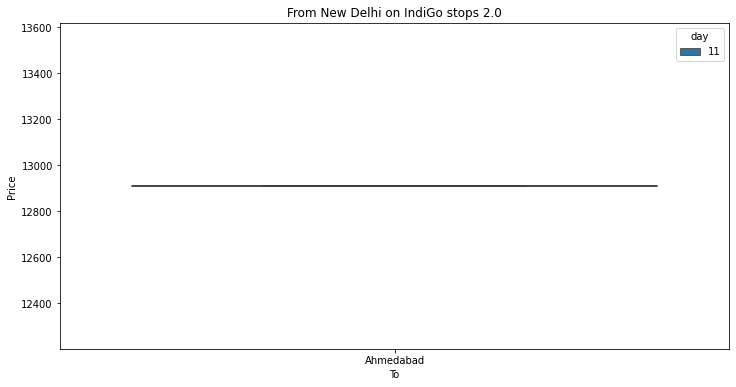

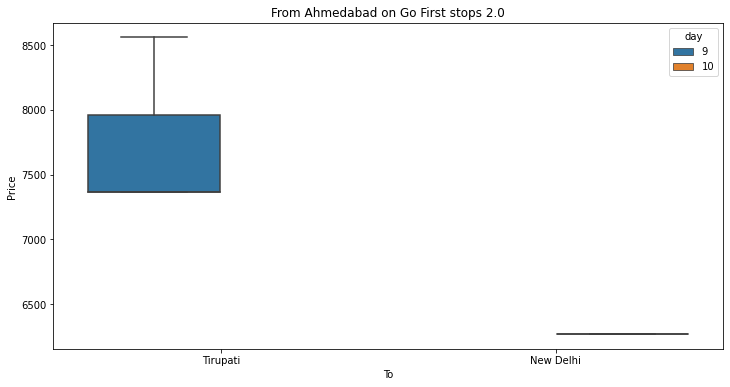

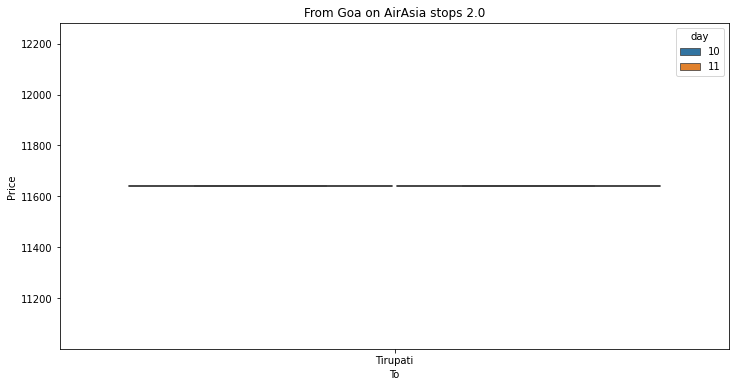

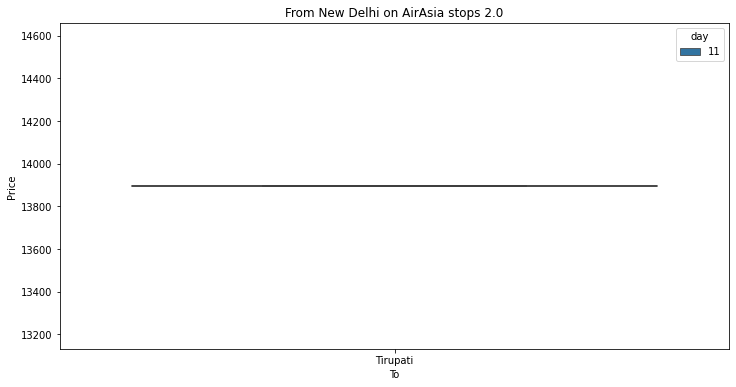

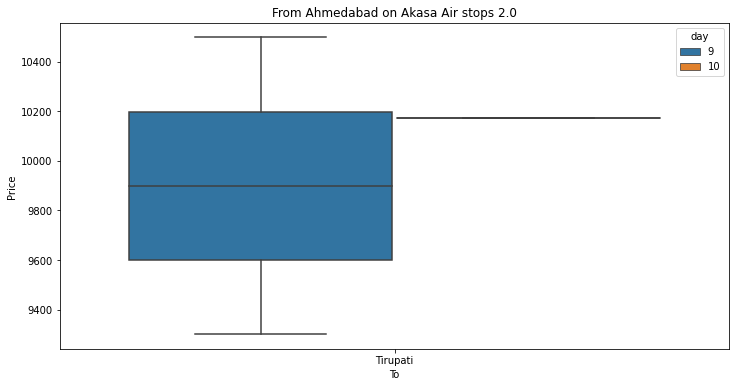

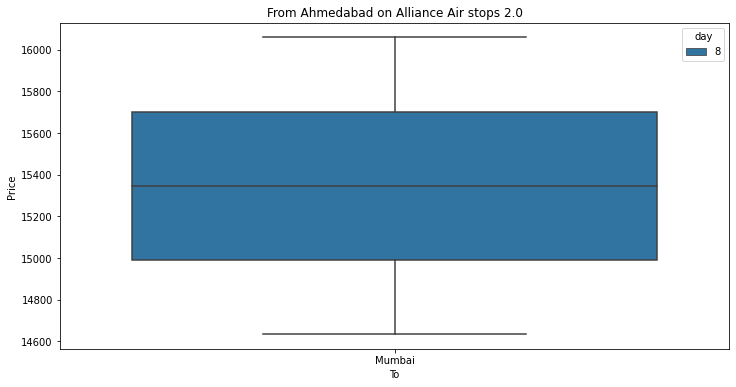

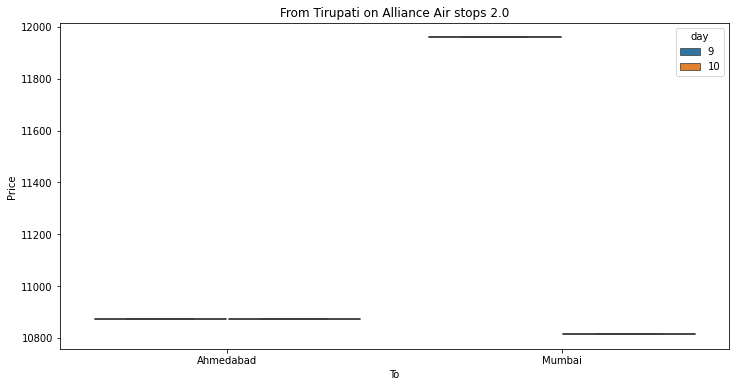

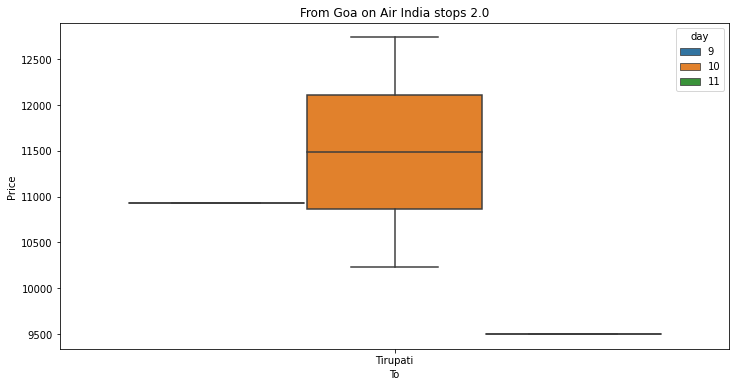

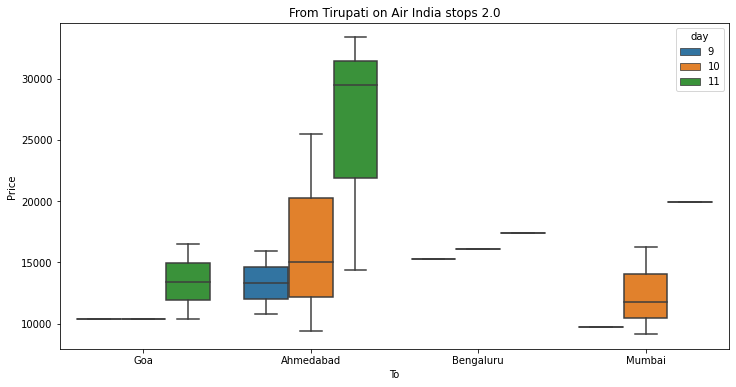

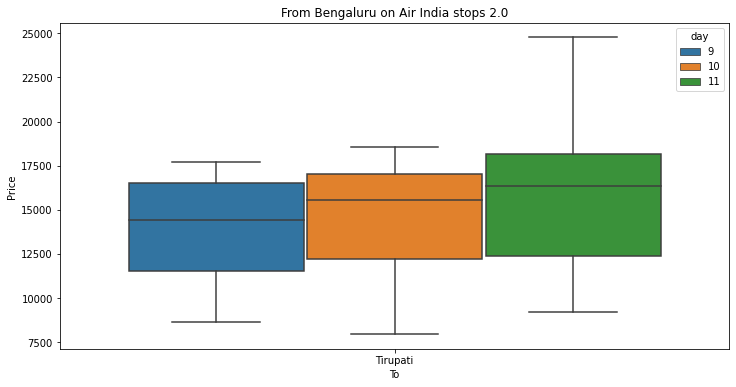

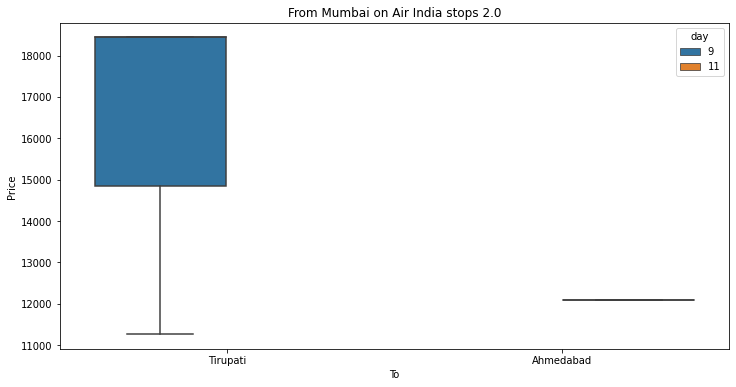

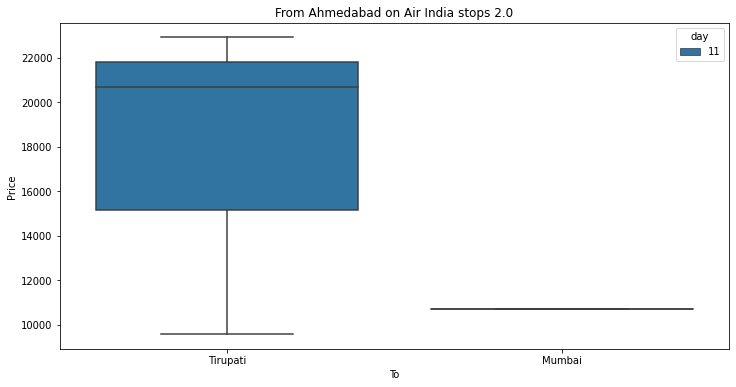

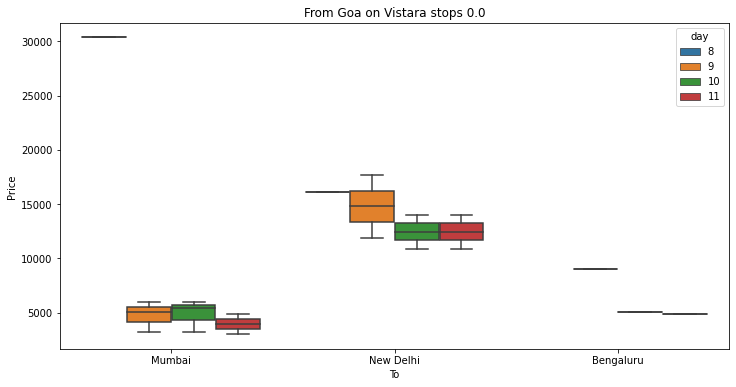

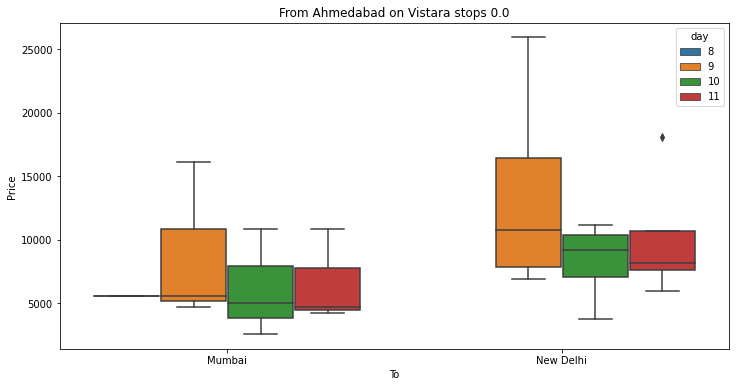

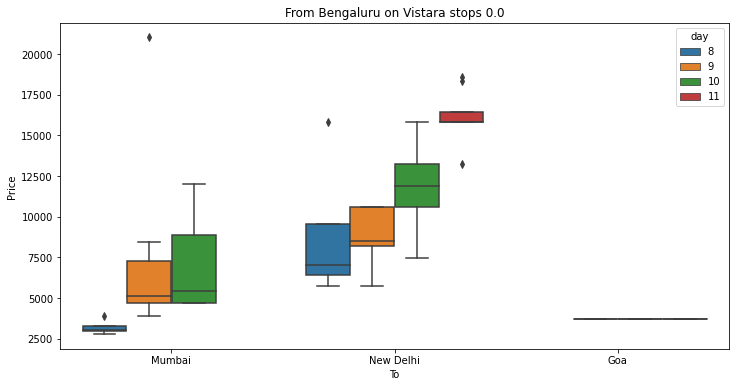

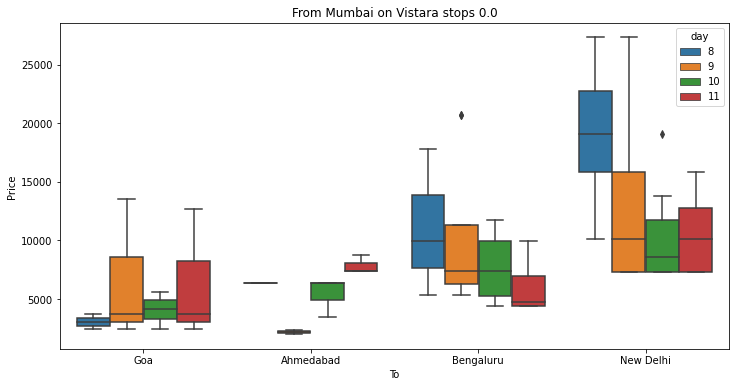

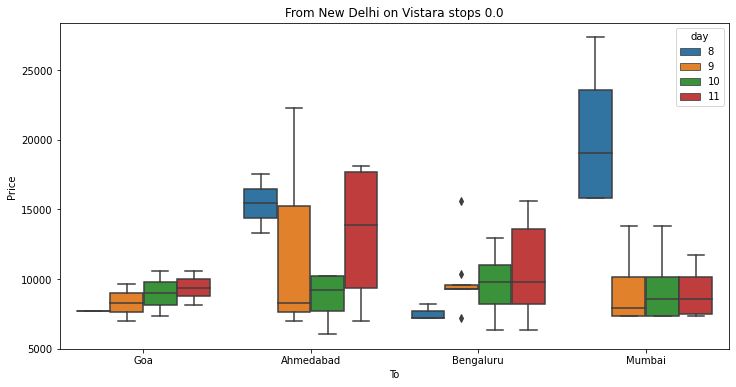

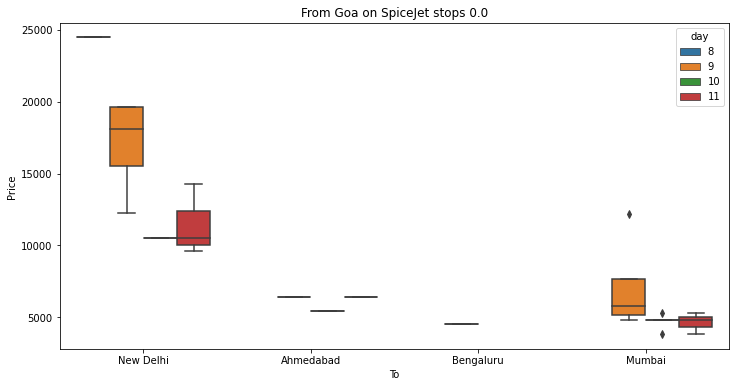

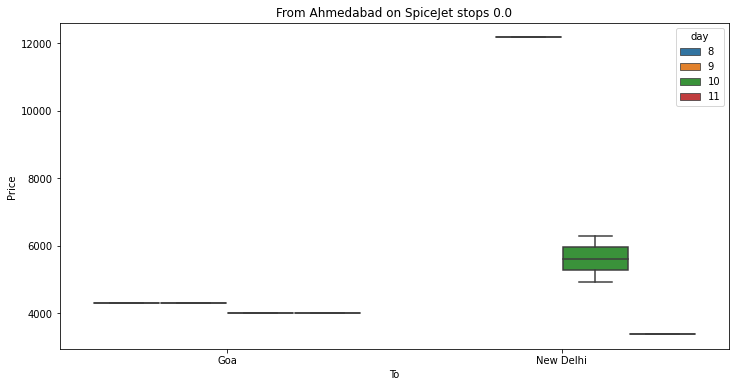

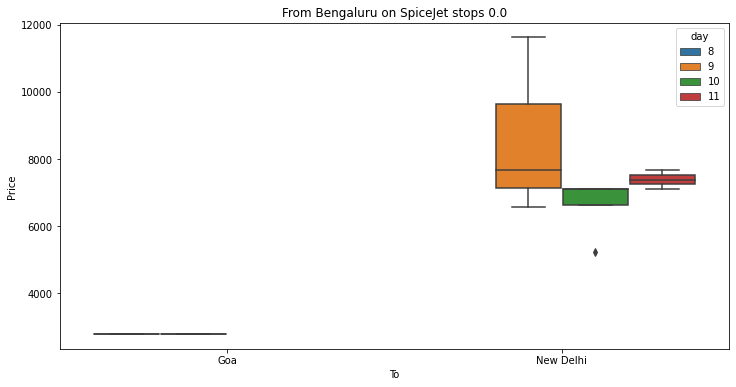

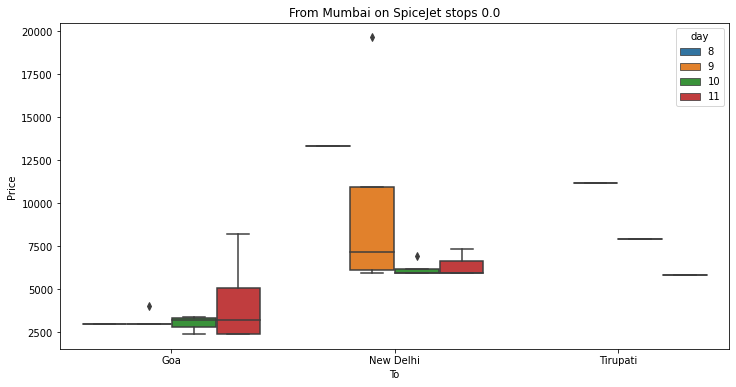

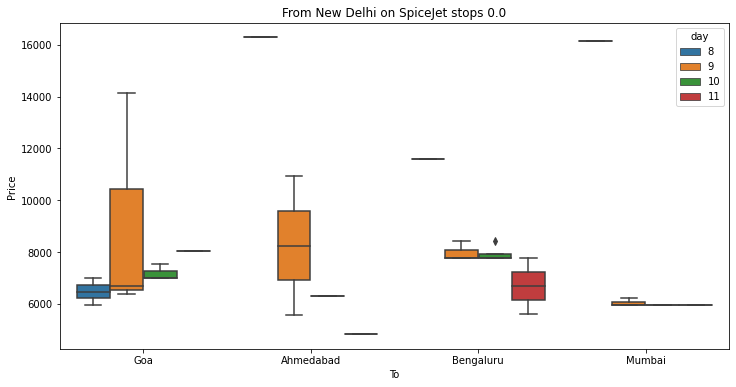

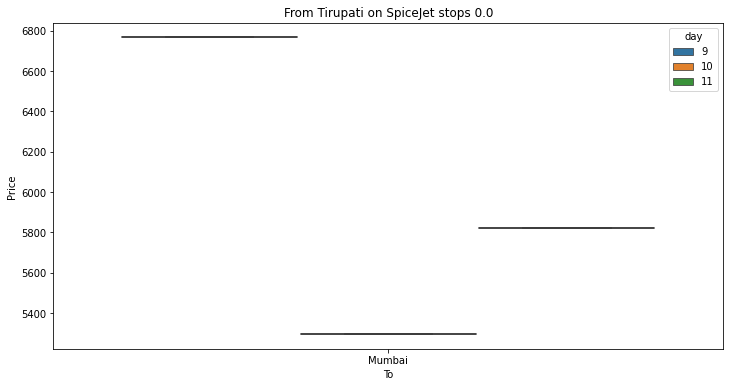

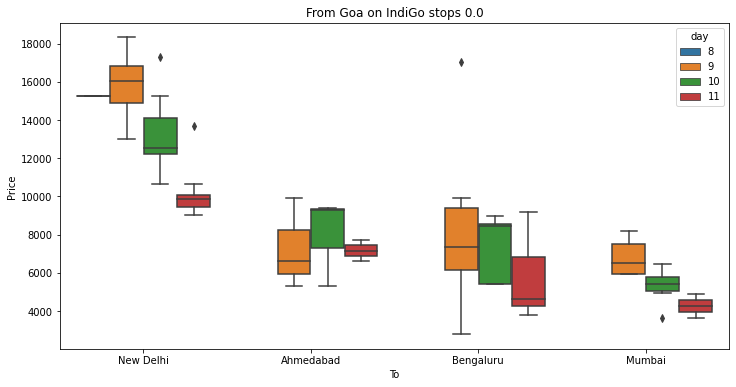

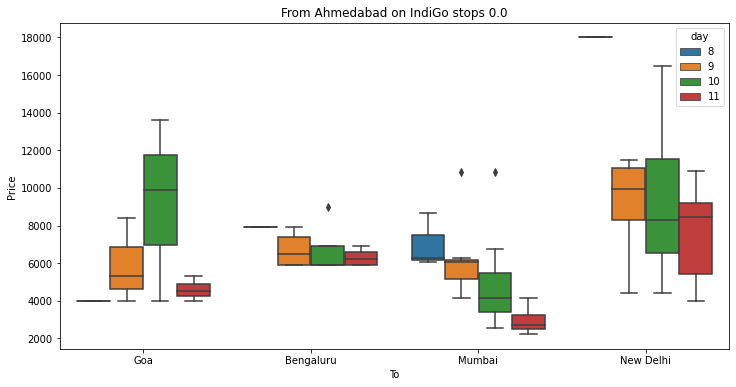

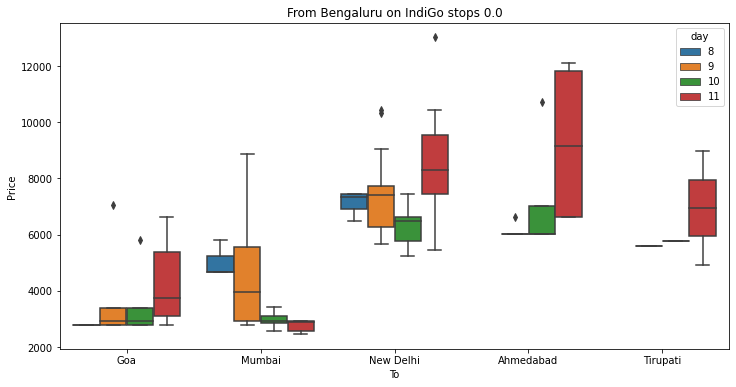

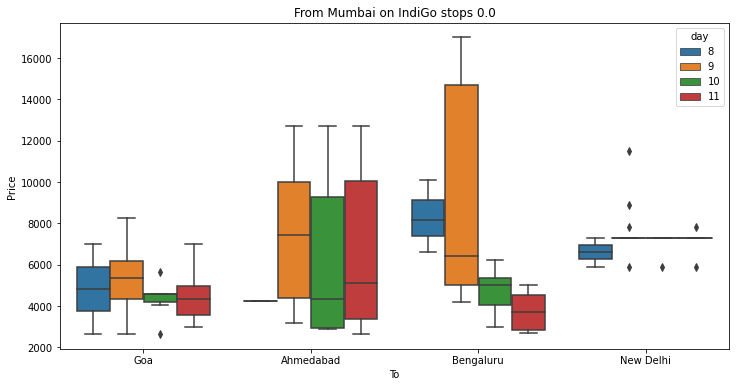

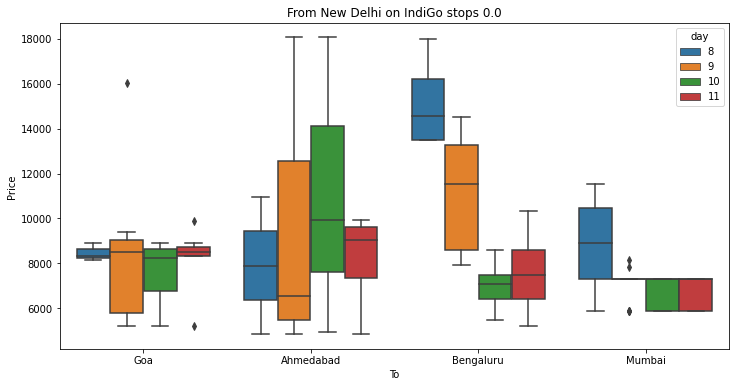

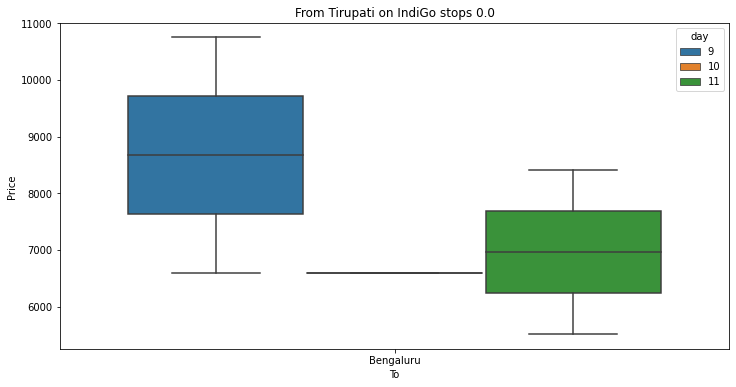

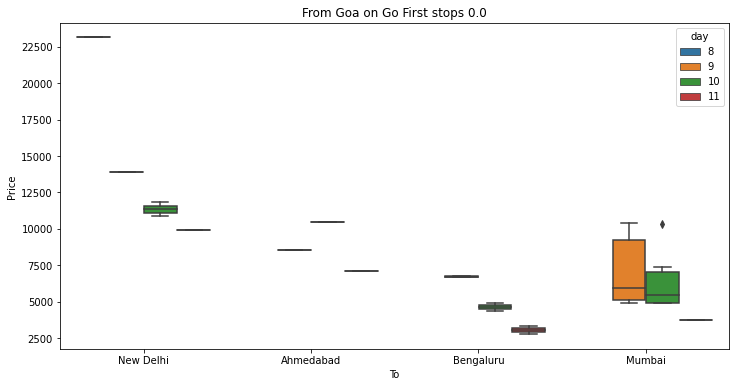

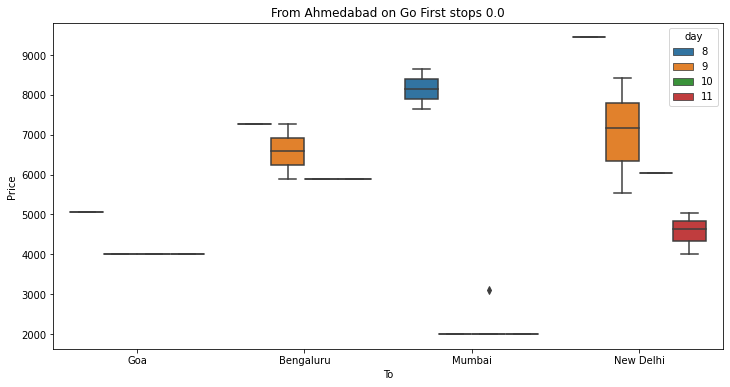

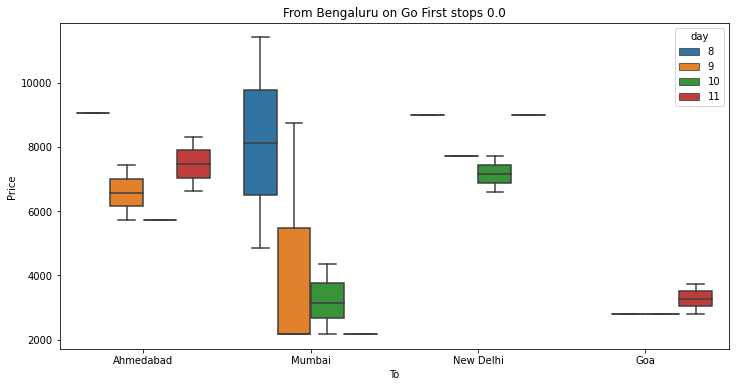

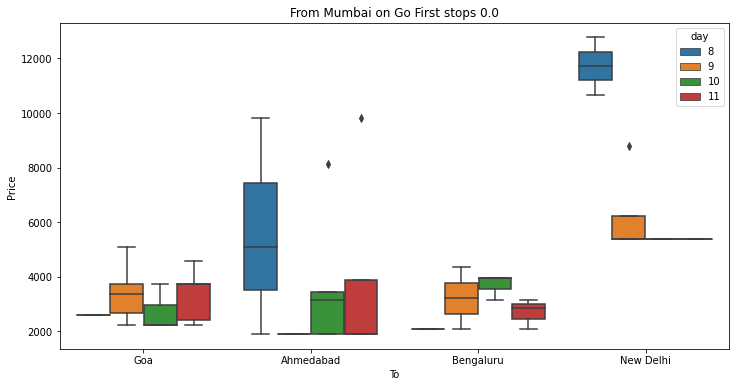

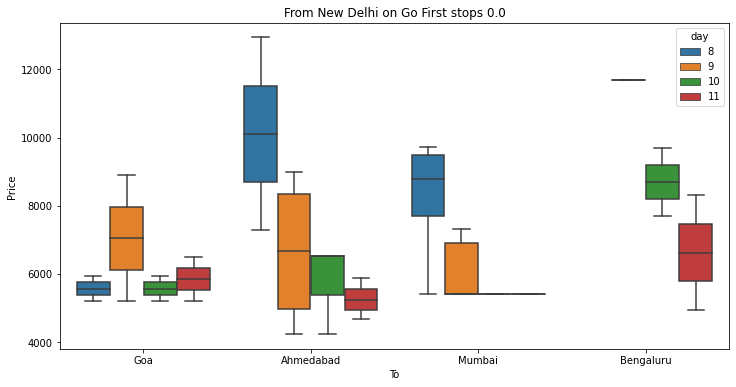

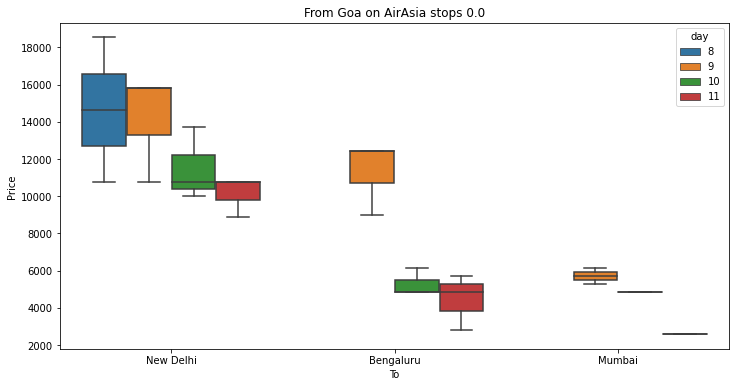

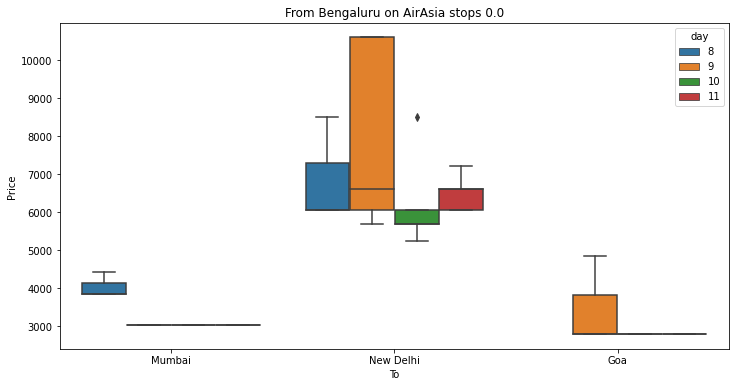

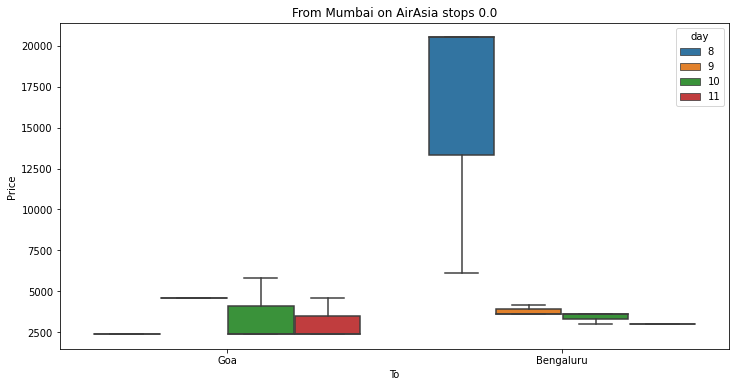

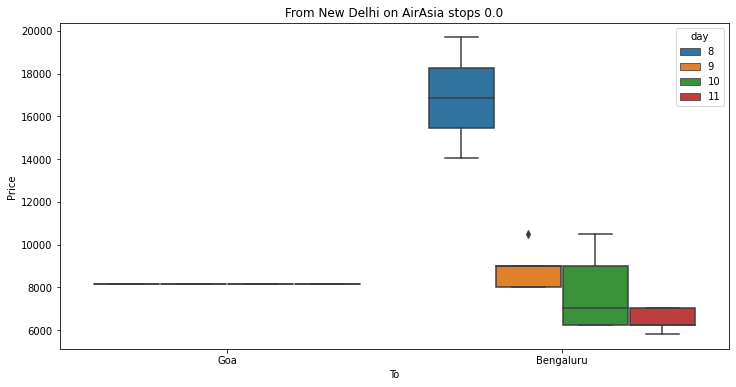

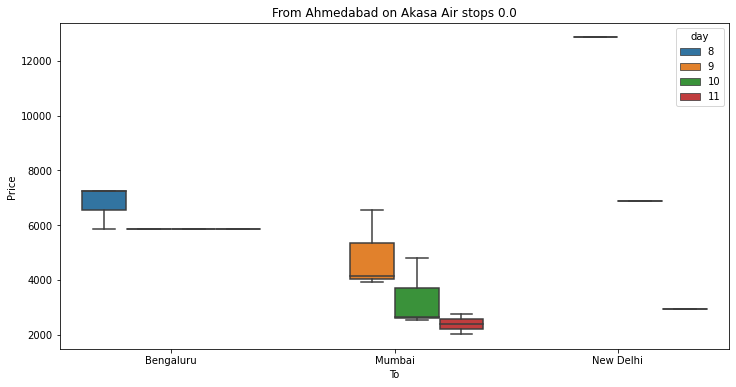

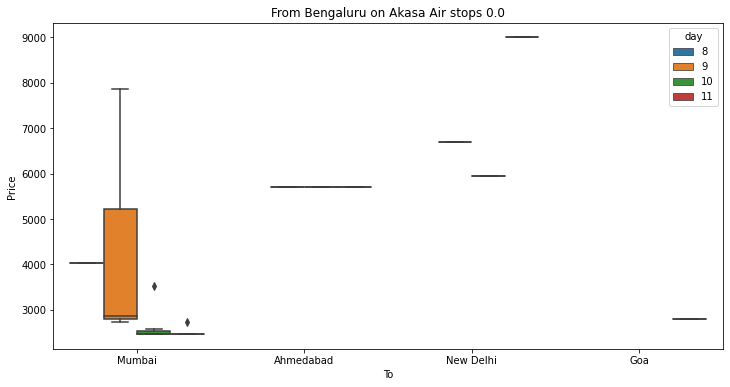

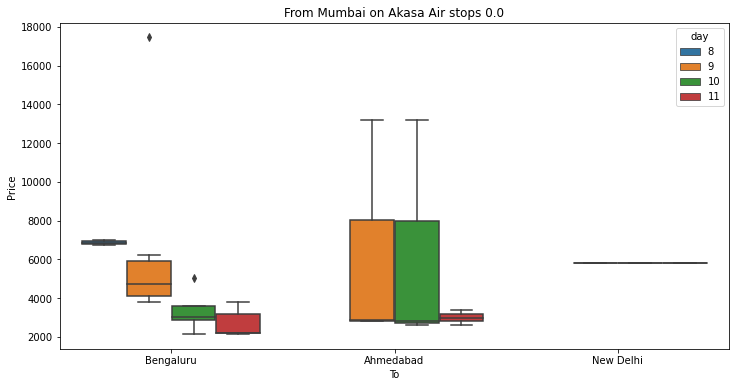

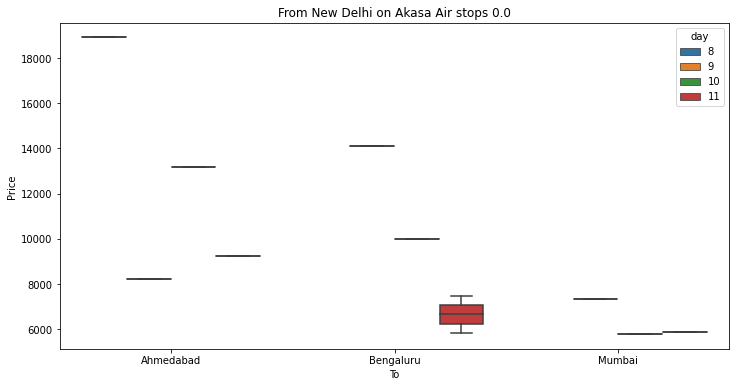

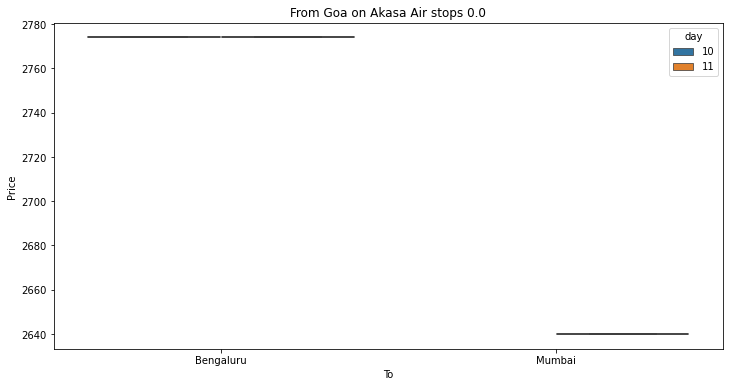

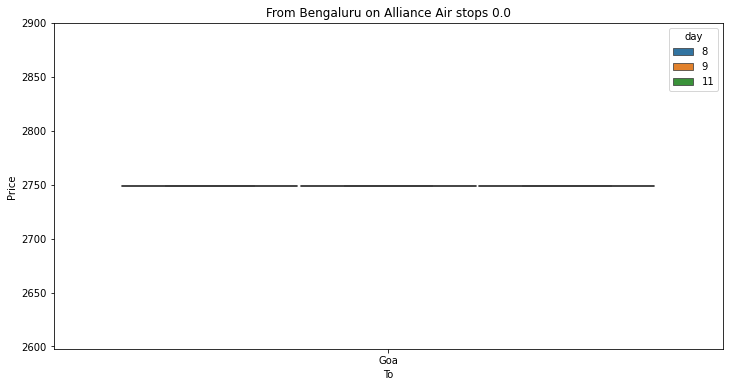

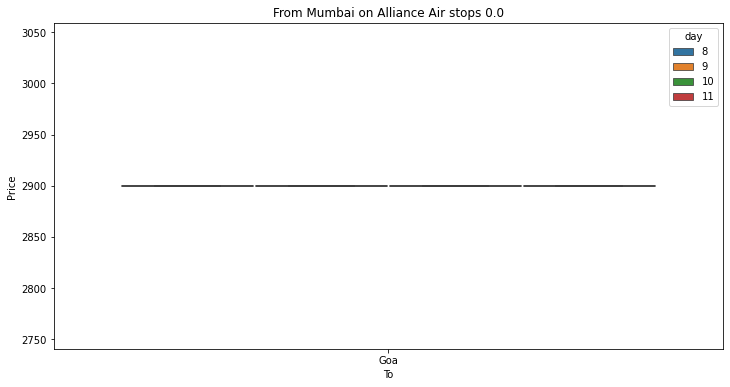

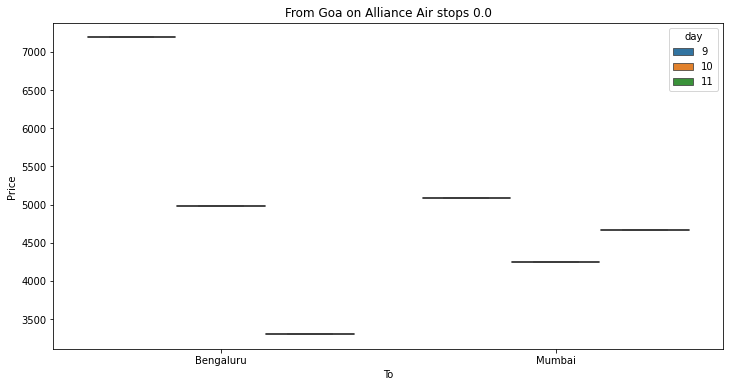

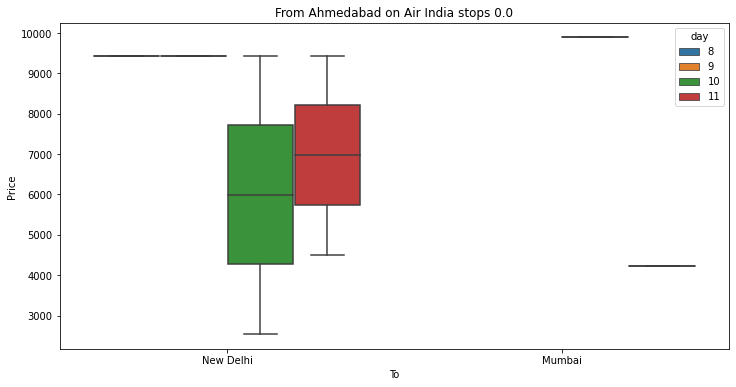

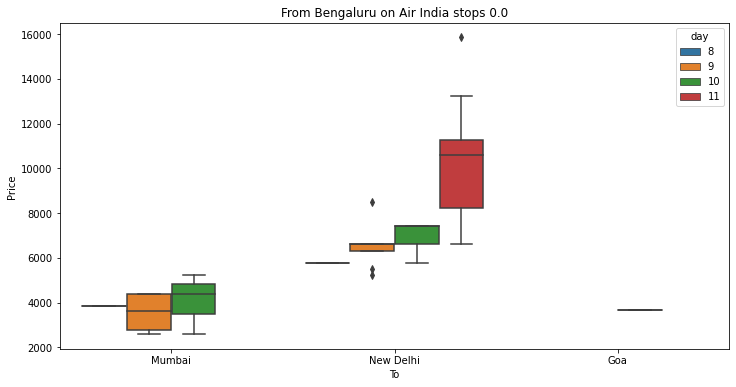

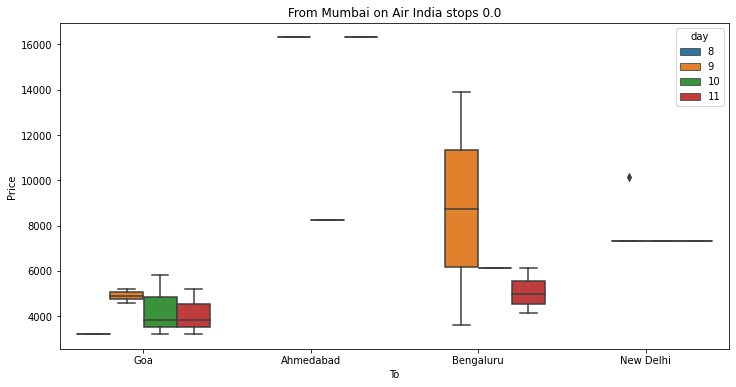

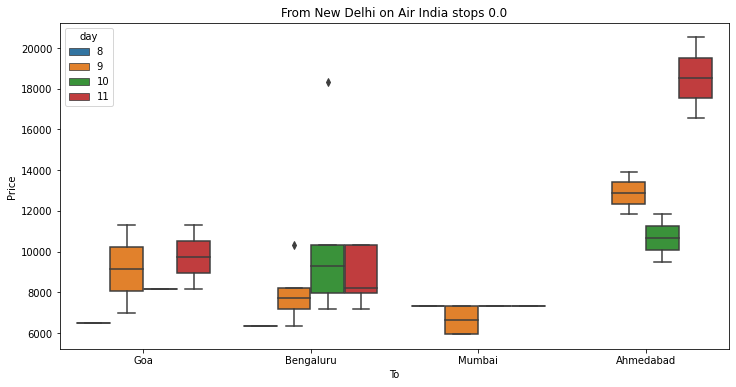

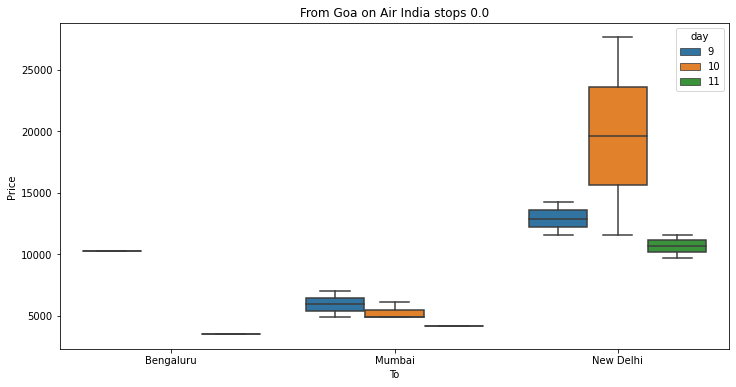

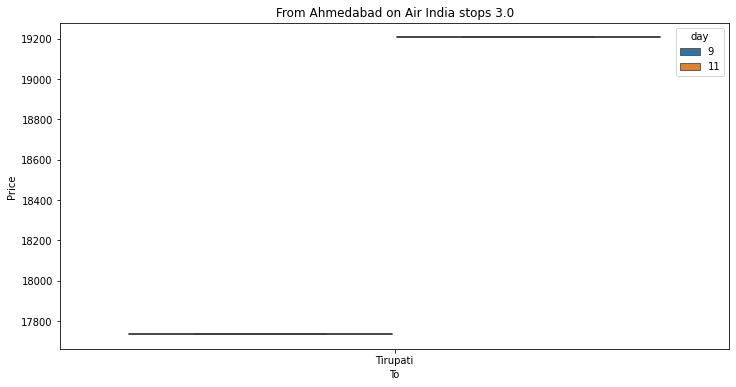

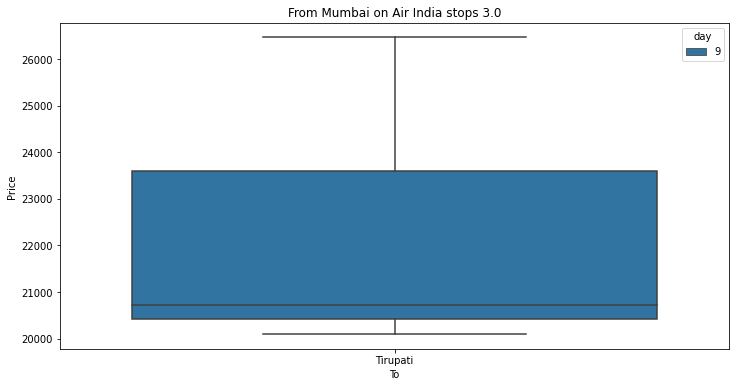

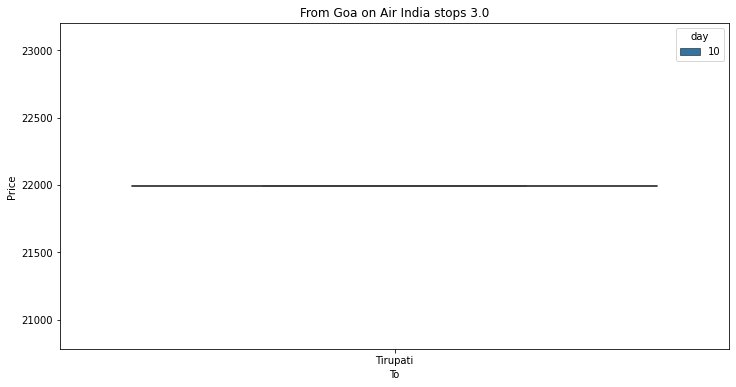

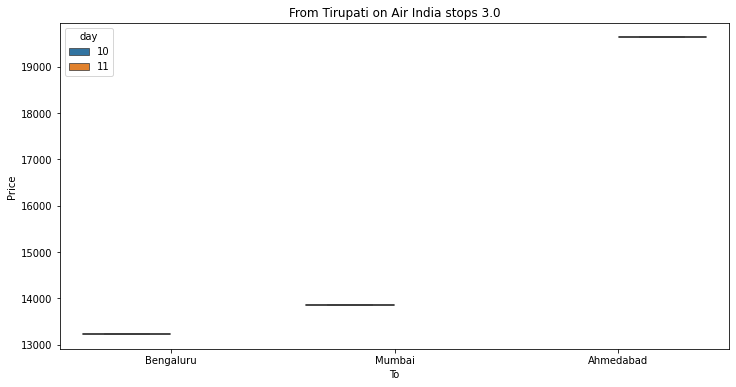

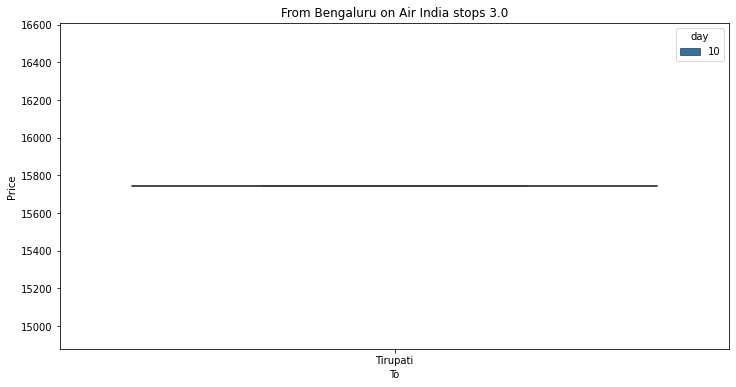

In [26]:
for j in df1['Stops'].unique():
    for i in df1['first_airline'].unique():
        df_stops_equal_0 = df1.loc[(df1['Stops'] == j) & (df1['first_airline'] == i)]

        # Get all the unique values of the 'From' column
        unique_values = df_stops_equal_0['From'].unique()

        # Iterate over the unique values
        for value in unique_values:
            # Filter the DataFrame for the current value
            df_filtered = df_stops_equal_0.loc[df_stops_equal_0['From'] == value]
            plt.figure(figsize=(12,6))
            # Create a catplot
            sns.boxplot(x='To', y='Price', hue='day',  data=df_filtered)
            # Add labels to the y-axes
            plt.ylabel('Price')
            plt.title("From " + value + " on " + str(i)+' stops '+str(j));

- Goa to Ahmedabad on Vistara with 1 stop, the median price is quite different depending on the day of the week. It's lowest on day 10 at 6101 and it's highest on day 8 at 32110. Similarly, for flights from Ahmedabad to Goa on Vistara with 1 stop, the median price is lowest on day 10 at 5214 and highest on day 8 at 8280.5.

- For flights between Goa and Tirupati on SpiceJet with 1 stop, the prices tend to be more expensive on days 8, 9, and 11. Additionally, it also appears that the prices for flights between Goa and Tirupati tend to be more expensive than flights between other destinations.

- For flights between Tirupati and Bengaluru on Star Air with 1 stop, the prices are consistent with Q1, Q3 and median fare being 7612 on day 9, and 7969 on day 11. This implies that the fare prices do not vary much. Similarly, for the route Bengaluru to Tirupati, the prices are consistent with Q1, Q3 and median fare being 13822 on day 9, and 6612 on day 11.

- For flights between Goa to Ahmedabad on Vistara with 2 stops, the highest ticket price is observed on day 8 with 64163.0. Similarly, the highest median prices are observed on day 9 for Ahmedabad to Tirupati on Vistara with 2 stops, on day 8 for Tirupati to Mumbai on SpiceJet with 2 stops, on day 11 for Tirupati to Ahmedabad on IndiGo with 2 stops, on day 9 for Mumbai to Tirupati on IndiGo with 2 stops, on day 11 for New Delhi to Ahmedabad on IndiGo with 2 stops, on day 10 and 11 for Goa on AirAsia with 2 stops, and on day 11 for New Delhi on AirAsia with 2 stops.

# **check skewness**

In [30]:
numericalCol=['day','Stops','Duration_minutes']
df.skew()[numericalCol].sort_values()

day                -0.210065
Stops               0.761084
Duration_minutes    1.871997
dtype: float64

In [31]:

#using power transform to transform and normalize the dataset and storing it in A and copying it to df
from sklearn.preprocessing import power_transform
B=df[numericalCol].copy()
A=power_transform(B)
A=pd.DataFrame(A,columns=B.columns)
df[B.columns]=A.copy()
df

,Airline,From,To,Duration_minutes,Stops,Price,day,Arrival_time_hour,Arrival_time_min,Departure_time_hour,Departure_time_min
0,Vistara,Goa,Ahmedabad,2.002474,0.999099,22729.0,-1.778614,22,55,21,55
1,Vistara,Goa,Ahmedabad,1.734505,0.999099,32110.0,-1.778614,16,40,22,45
2,Vistara,Goa,Ahmedabad,1.694230,0.999099,37988.0,-1.778614,15,00,21,55
3,Vistara,Goa,Ahmedabad,1.651391,1.684477,64163.0,-1.778614,15,00,22,45
4,SpiceJet,Goa,Tirupati,1.429357,0.999099,20473.0,-1.778614,07,20,18,40
...,...,...,...,...,...,...,...,...,...,...,...
2890,Vistara,New Delhi,Mumbai,-0.583713,-0.925881,10155.0,1.329011,22,55,20,40
2891,Air India,New Delhi,Mumbai,0.587449,0.999099,10260.0,1.329011,15,50,10,15
2892,Vistara,New Delhi,Mumbai,-0.583713,-0.925881,11730.0,1.329011,21,15,19,00
2893,Vistara,New Delhi,Mumbai,-0.583713,-0.925881,11730.0,1.329011,22,00,19,45


In [32]:
df.skew()[numericalCol].sort_values()

day                -0.066332
Duration_minutes    0.082620
Stops               0.203393
dtype: float64

# Encoding

In [33]:
# encoding using label enccoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[objectColumns]= df[objectColumns].apply(le.fit_transform)
df

,Airline,From,To,Duration_minutes,Stops,Price,day,Arrival_time_hour,Arrival_time_min,Departure_time_hour,Departure_time_min
0,48,2,0,2.002474,0.999099,22729.0,-1.778614,22,12,21,11
1,48,2,0,1.734505,0.999099,32110.0,-1.778614,16,9,22,9
2,48,2,0,1.694230,0.999099,37988.0,-1.778614,15,0,21,11
3,48,2,0,1.651391,1.684477,64163.0,-1.778614,15,0,22,9
4,39,2,5,1.429357,0.999099,20473.0,-1.778614,7,5,18,8
...,...,...,...,...,...,...,...,...,...,...,...
2890,48,4,3,-0.583713,-0.925881,10155.0,1.329011,22,12,20,8
2891,0,4,3,0.587449,0.999099,10260.0,1.329011,15,11,10,3
2892,48,4,3,-0.583713,-0.925881,11730.0,1.329011,21,3,19,0
2893,48,4,3,-0.583713,-0.925881,11730.0,1.329011,22,0,19,9


# checking correlation

In [34]:
df

,Airline,From,To,Duration_minutes,Stops,Price,day,Arrival_time_hour,Arrival_time_min,Departure_time_hour,Departure_time_min
0,48,2,0,2.002474,0.999099,22729.0,-1.778614,22,12,21,11
1,48,2,0,1.734505,0.999099,32110.0,-1.778614,16,9,22,9
2,48,2,0,1.694230,0.999099,37988.0,-1.778614,15,0,21,11
3,48,2,0,1.651391,1.684477,64163.0,-1.778614,15,0,22,9
4,39,2,5,1.429357,0.999099,20473.0,-1.778614,7,5,18,8
...,...,...,...,...,...,...,...,...,...,...,...
2890,48,4,3,-0.583713,-0.925881,10155.0,1.329011,22,12,20,8
2891,0,4,3,0.587449,0.999099,10260.0,1.329011,15,11,10,3
2892,48,4,3,-0.583713,-0.925881,11730.0,1.329011,21,3,19,0
2893,48,4,3,-0.583713,-0.925881,11730.0,1.329011,22,0,19,9


In [35]:
numeri=['Duration_minutes', 'Stops', 'Price', 'day']
df[numeri].corr()['Price'].sort_values()

day                -0.206170
Stops               0.381947
Duration_minutes    0.423467
Price               1.000000
Name: Price, dtype: float64

# plotting heatmap to see the correlation with other feature

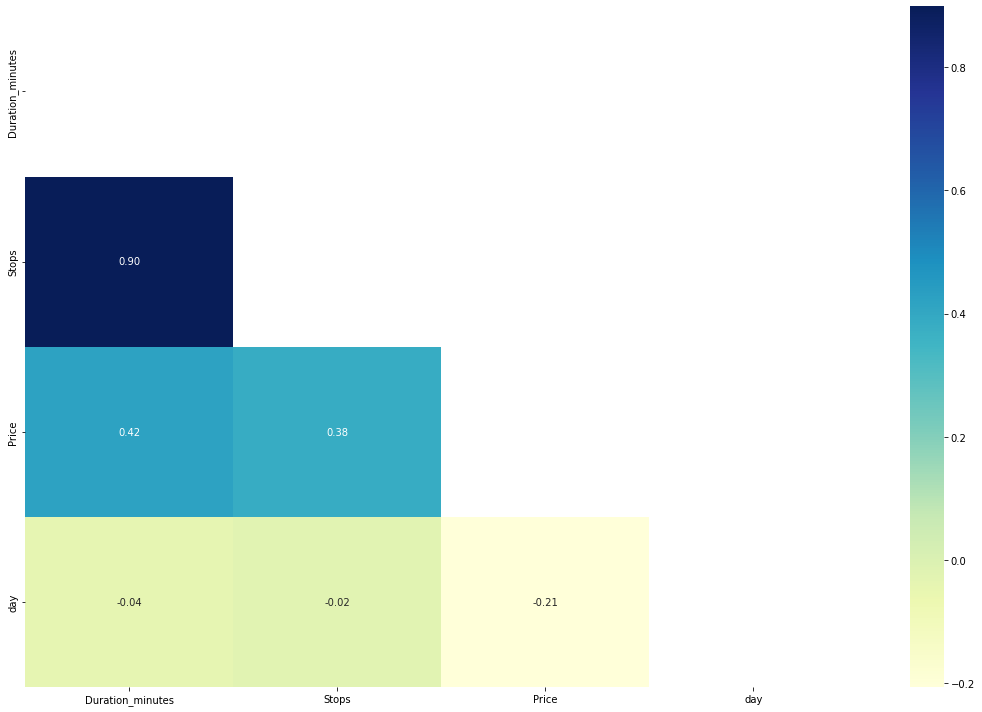

In [36]:
plt.figure(figsize=(15, 10))
mask = np.triu(df[numeri].corr())
sns.heatmap(df[numeri].corr(),cmap="YlGnBu",annot = True, fmt = '.2f',mask = mask)
plt.tight_layout()

# using vif to check for multicolinearity

In [37]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a copy of the numerical columns
numerical_cols = df[numeri].copy()

# Drop the 'Price' column
t = numerical_cols.drop(['Price'], axis=1)

# Standardize the data using StandardScaler
sc = StandardScaler()
d = sc.fit_transform(t)

# Create an empty dataframe to store the VIF values
vif = pd.DataFrame()

# Calculate the VIF values for each variable
vif["vif"] = [variance_inflation_factor(d, i) for i in range(d.shape[1])]

# Add the feature names to the dataframe
vif["features"] = t.columns

# Sort the dataframe by VIF in descending order
vif = vif.sort_values(by='vif',ascending=False)

vif

,vif,features
0,5.203496,Duration_minutes
1,5.198154,Stops
2,1.002346,day


# Outliers check

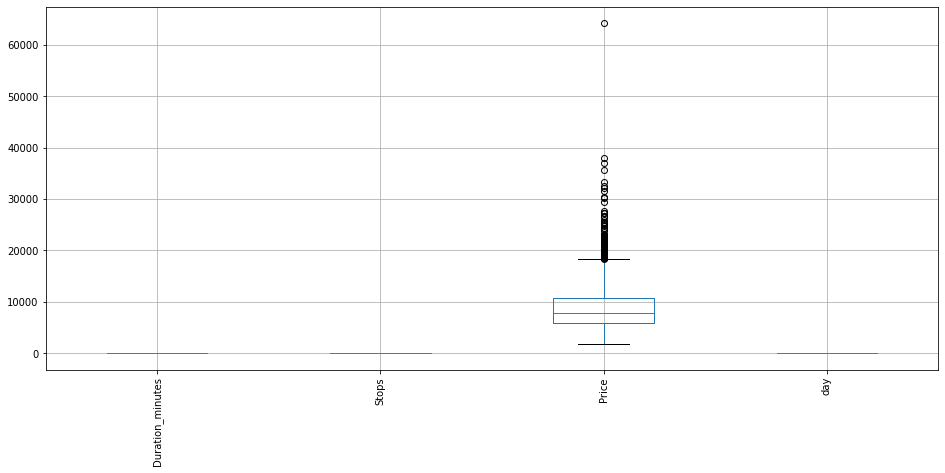

In [38]:
# visualizing
df[numeri].iloc[:,:].boxplot(figsize = (16,8))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

# using z score for treating

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(df[numericalCol]))
df_x=df[(z<3).all(axis=1)]
data_loss=((df.shape[0]-df_x.shape[0])/df.shape[0])*100
print("data loss ", data_loss, " %")

data loss  0.0  %


# spliting data

In [40]:
X=df.drop(['Price'],axis=1)
Y=df['Price']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


In [43]:
dt= DecisionTreeRegressor()
rf= RandomForestRegressor()
etr=ExtraTreesRegressor()
grad=GradientBoostingRegressor()
adboost_reg= AdaBoostRegressor()

In [44]:
clfs = {
    'ada' : adboost_reg,
    'GRAD': grad,
    'DT' : dt,
    'RF' : rf, 
    'ETR': etr, 
}

In [45]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV

# Initialize lists to store the metrics
r2_scores = []
mse_scores = []
mae_scores = []
cv_scores = []
diff_scores = []

# Define a dictionary of the parameters you want to tune
param_grid = {'random_state': range(0, 101, 10)}

for name, clf in clfs.items():
    print("Regressor: ", name)
    # Use GridSearchCV to find the best random state for the classifier
    gscv = GridSearchCV(clf, param_grid, cv=5, scoring='r2')
    gscv.fit(X_train, y_train)
    
    # Get the best parameters
    best_params = gscv.best_params_
    
    # Update the classifier with the best parameters
    clf.set_params(**best_params)
    
    # Use cross_val_score to find the best cross-validation score
    cv_score = cross_val_score(clf, X_train, y_train, cv=5, scoring='r2')
    
    # Fit the classifier with the best parameters
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate the metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Append the metrics to the provided lists
    r2_scores.append(r2)
    mse_scores.append(mse)
    mae_scores.append(mae)
    cv_scores.append(np.mean(cv_score))
    diff = r2 - np.mean(cv_score)
    diff_scores.append(diff)
    
    # Print the values
    print("Best random state: ", best_params['random_state'])
    print("Best cross-validation score: ", np.mean(cv_score))
    print("R2 score: ", r2)
    print("Mean squared error: ", mse)
    print('difference between cv_Score and r2_score ',diff)
    print()


Regressor:  ada
Best random state:  70
Best cross-validation score:  0.038636556100515015
R2 score:  -0.1839062370558584
Mean squared error:  24305351.929419164
difference between cv_Score and r2_score  -0.22254279315637343

Regressor:  GRAD
Best random state:  80
Best cross-validation score:  0.5504656073928805
R2 score:  0.4400013583226957
Mean squared error:  11496657.116877234
difference between cv_Score and r2_score  -0.11046424907018482

Regressor:  DT
Best random state:  50
Best cross-validation score:  0.32347172913601624
R2 score:  -0.14203128107396878
Mean squared error:  23445667.68221071
difference between cv_Score and r2_score  -0.465503010209985

Regressor:  RF
Best random state:  60
Best cross-validation score:  0.592562692620219
R2 score:  0.5250636015505205
Mean squared error:  9750346.73109912
difference between cv_Score and r2_score  -0.06749909106969854

Regressor:  ETR
Best random state:  20
Best cross-validation score:  0.6105648510714419
R2 score:  0.571828069957

In [46]:
df_model = pd.DataFrame({
    'classifier': list(clfs.keys()),
    'r2': r2_scores,
    'cv_score': cv_scores,
    'diff': diff_scores,
    'mse': mse_scores,
    'mae': mae_scores
})

# Sort the DataFrame by the R2 score in descending order and the difference in ascending order
df_model = df_model.sort_values(['r2', 'diff'], ascending=[False, True])

# Display the DataFrame
df_model


,classifier,r2,cv_score,diff,mse,mae
4,ETR,0.571828,0.610565,-0.038737,8.790282e+06,1874.266883
3,RF,0.525064,0.592563,-0.067499,9.750347e+06,1980.560832
1,GRAD,0.440001,0.550466,-0.110464,1.149666e+07,2174.638693
2,DT,-0.142031,0.323472,-0.465503,2.344567e+07,2591.167530
0,ada,-0.183906,0.038637,-0.222543,2.430535e+07,4307.625727


#### inference
- etr is the best model
    - highest r2_score and cv_Score
    - least difference between cv_sccore and r2_score
    - least error value for mse and mae

In [57]:
param_grid = {'n_estimators': [150, 200,250, 300],
              'max_depth': [ 16, 17, 18, 19],
              'min_samples_split': [2, 3, 4, 5,],
              'min_samples_leaf': [1, 2, 3, 4],
              'random_state': [20]
             }

# Initialize the ETR model
etr = ExtraTreesRegressor()

# Perform the grid search with cross-validation
grid_search = GridSearchCV(etr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 20}
Best score:  0.6109264517441215


In [58]:
etr = ExtraTreesRegressor(max_depth= 17, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200, random_state= 20)

In [59]:
etr.fit(X_train, y_train)
y_te=etr.predict(X_test)
r2=round(r2_score(y_test,y_te)*100,2)
print(r2)

56.36


In [60]:
cv_score=cross_val_score(etr,X_train, y_train,cv=5)
cv_mean=round(cv_score.mean()*100,2)
print(cv_mean)

61.09


# Storing model and loading it

In [61]:
import pickle

In [62]:
filename='flight_price.pkl'
pickle.dump(etr,open(filename,'wb'))

In [63]:
l_m=pickle.load(open('flight_price.pkl','rb'))
re=l_m.score(X_test,y_test)
print(re*100)

56.35861789564621
